In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_32681,2019-07-27 17:23:20,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,...,43.997857,226.236363,1851.699486,43.076502,ABC,Medium,NaN,0.458720,NaN,7.102876
1,WM_38203,2019-09-07 12:33:20,94.711791,-99.000000,-99.000000,5.060558,42.255446,40.209990,1984.417193,71.490737,...,85.210171,253.762267,882.499288,33.916687,AC,Medium,4.302109,0.359927,26.882495,4.927684
2,WM_3276,2018-11-27 21:13:20,95.268257,NaN,44.958045,0.138448,-46.043109,40.544919,2088.008555,70.842057,...,-99.000000,504.601626,1707.735010,36.806050,D,Low,2.496350,0.346864,NaN,4.952830
3,WM_19149,2019-04-05 19:43:20,309.344194,16.447248,44.216279,-99.000000,41.137433,42.331889,2162.657844,70.735399,...,44.052881,211.720491,1695.572571,36.772033,AC,Medium,3.869691,0.327765,26.532459,4.112390
4,WM_4763,2018-12-08 23:53:20,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,...,45.045214,NaN,1882.378939,-8.962226,A,Medium,4.726000,0.354647,27.595549,7.966535


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     19740 non-null  object 
 1   datetime                        19740 non-null  object 
 2   wind_speed(m/s)                 19553 non-null  float64
 3   atmospheric_temperature(°C)     17295 non-null  float64
 4   shaft_temperature(°C)           19738 non-null  float64
 5   blades_angle(°)                 19594 non-null  float64
 6   gearbox_temperature(°C)         19739 non-null  float64
 7   engine_temperature(°C)          19732 non-null  float64
 8   motor_torque(N-m)               19721 non-null  float64
 9   generator_temperature(°C)       19731 non-null  float64
 10  atmospheric_pressure(Pascal)    17822 non-null  float64
 11  area_temperature(°C)            19740 non-null  float64
 12  windmill_body_temperature(°C)   

In [5]:
train_df.isna().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    187
atmospheric_temperature(°C)       2445
shaft_temperature(°C)                2
blades_angle(°)                    146
gearbox_temperature(°C)              1
engine_temperature(°C)               8
motor_torque(N-m)                   19
generator_temperature(°C)            9
atmospheric_pressure(Pascal)      1918
area_temperature(°C)                 0
windmill_body_temperature(°C)     1658
wind_direction(°)                 3568
resistance(ohm)                      1
rotor_torque(N-m)                  391
turbine_status                    1240
cloud_level                        191
blade_length(m)                   3546
blade_breadth(m)                     0
windmill_height(m)                 368
windmill_generated_power(kW/h)     145
dtype: int64

In [6]:
train_df['wind_speed(m/s)'].fillna(train_df['wind_speed(m/s)'].median(), inplace = True)
train_df['atmospheric_temperature(°C)'].fillna(train_df['atmospheric_temperature(°C)'].median(), inplace = True)
train_df['shaft_temperature(°C)'].fillna(train_df['shaft_temperature(°C)'].median(), inplace = True)
train_df['blades_angle(°)'].fillna(train_df['blades_angle(°)'].median(), inplace = True)
train_df['gearbox_temperature(°C)'].fillna(train_df['gearbox_temperature(°C)'].median(), inplace = True)
train_df['engine_temperature(°C)'].fillna(train_df['engine_temperature(°C)'].median(), inplace = True)
train_df['motor_torque(N-m)'].fillna(train_df['motor_torque(N-m)'].median(), inplace = True)
train_df['generator_temperature(°C)'].fillna(train_df['generator_temperature(°C)'].median(), inplace = True)
train_df['atmospheric_pressure(Pascal)'].fillna(train_df['atmospheric_pressure(Pascal)'].median(), inplace = True)
train_df['area_temperature(°C)'].fillna(train_df['area_temperature(°C)'].median(), inplace = True)
train_df['windmill_body_temperature(°C)'].fillna(train_df['windmill_body_temperature(°C)'].median(), inplace = True)
train_df['wind_direction(°)'].fillna(train_df['wind_direction(°)'].median(), inplace = True)
train_df['resistance(ohm)'].fillna(train_df['resistance(ohm)'].median(), inplace = True)
train_df['rotor_torque(N-m)'].fillna(train_df['rotor_torque(N-m)'].median(), inplace = True)
train_df['blade_length(m)'].fillna(train_df['blade_length(m)'].median(), inplace = True)
train_df['windmill_height(m)'].fillna(train_df['windmill_height(m)'].median(), inplace = True)
train_df['windmill_generated_power(kW/h)'].fillna(train_df['windmill_generated_power(kW/h)'].median(), inplace = True)


In [7]:
train_df['turbine_status'].unique()

array(['ABC', 'AC', 'D', 'A', 'AB', 'BD', 'B2', 'AAA', 'BB', 'B', 'BA',
       'A2', 'BCB', 'BBB', nan], dtype=object)

In [8]:
train_df['cloud_level'].unique()

array(['Medium', 'Low', 'Extremely Low', nan], dtype=object)

In [9]:
train_df['turbine_status'] = train_df['turbine_status'].fillna(train_df['turbine_status'].mode()[0])
train_df['cloud_level'] = train_df['cloud_level'].fillna(train_df['cloud_level'].mode()[0])

In [10]:
train_df.isna().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

In [11]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [12]:
train_df['Year'] = train_df['datetime'].dt.year
train_df['Month'] = train_df['datetime'].dt.month
train_df['Day'] = train_df['datetime'].dt.day
train_df['Hour'] = train_df['datetime'].dt.hour

In [13]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),Year,Month,Day,Hour
0,WM_32681,2019-07-27 17:23:20,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,...,ABC,Medium,3.451530,0.458720,25.954383,7.102876,2019,7,27,17
1,WM_38203,2019-09-07 12:33:20,94.711791,-99.000000,-99.000000,5.060558,42.255446,40.209990,1984.417193,71.490737,...,AC,Medium,4.302109,0.359927,26.882495,4.927684,2019,9,7,12
2,WM_3276,2018-11-27 21:13:20,95.268257,16.156763,44.958045,0.138448,-46.043109,40.544919,2088.008555,70.842057,...,D,Low,2.496350,0.346864,25.954383,4.952830,2018,11,27,21
3,WM_19149,2019-04-05 19:43:20,309.344194,16.447248,44.216279,-99.000000,41.137433,42.331889,2162.657844,70.735399,...,AC,Medium,3.869691,0.327765,26.532459,4.112390,2019,4,5,19
4,WM_4763,2018-12-08 23:53:20,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,...,A,Medium,4.726000,0.354647,27.595549,7.966535,2018,12,8,23


In [14]:
train_df['cloud_level'].value_counts()

Low              9956
Medium           9582
Extremely Low     202
Name: cloud_level, dtype: int64

In [15]:
train_df.isna().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
Year                              0
Month                             0
Day                               0
Hour                              0
dtype: int64

In [16]:
train_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),Year,Month,Day,Hour
count,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,1.974000e+04,19740.000000,...,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000,19740.000000
mean,69.444734,2.406338,40.080398,-9.293430,41.021679,42.642055,1712.767281,65.062499,5.026253e+04,32.698675,...,1576.241688,25.937253,2.511257,0.397112,25.908947,6.119660,2018.812614,6.206383,15.509068,11.571884
std,76.018371,41.780345,26.886951,47.534363,44.157641,6.058067,824.736694,19.732170,1.772782e+05,7.757289,...,479.149626,32.216368,10.028903,0.061176,7.735423,2.668676,0.390231,3.448823,8.744400,6.923299
min,-402.608736,-99.000000,-99.000000,-137.659044,-244.974098,3.568055,500.000000,33.893779,-1.019257e+06,-30.000000,...,-1005.222988,-136.732217,-99.000000,0.200111,-20.918636,1.000244,2018.000000,1.000000,1.000000,0.000000
25%,21.403722,9.432770,41.630176,-1.193189,40.565424,41.910733,873.470106,41.276579,1.689929e+04,27.319049,...,1269.706977,13.826091,2.727397,0.346787,24.462213,4.079455,2019.000000,3.000000,8.000000,6.000000
50%,93.318631,16.156763,43.667967,-0.512293,43.233379,43.519244,2033.707335,70.760066,1.817859e+04,32.561791,...,1678.365141,33.031775,3.451530,0.398278,25.954383,5.767540,2019.000000,6.000000,15.000000,12.000000
75%,95.235114,22.610892,45.648955,5.303223,45.864573,45.186377,2460.360156,78.828304,1.164252e+05,38.156466,...,1828.294125,41.291045,4.172857,0.449400,27.451267,7.899627,2019.000000,9.000000,23.000000,18.000000
max,601.455670,80.217444,169.820455,165.932123,999.000000,49.945700,2992.737332,100.000000,1.272552e+06,55.000000,...,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358,2019.000000,12.000000,31.000000,23.000000


<AxesSubplot:xlabel='cloud_level', ylabel='Month'>

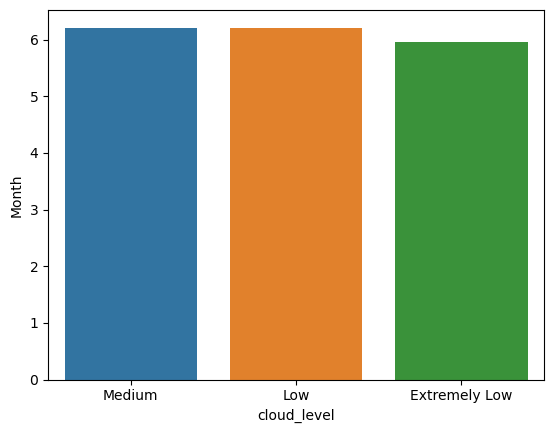

In [17]:
sns.barplot(data = train_df, x = 'cloud_level', y = 'Month', ci = None)

<AxesSubplot:xlabel='Year', ylabel='atmospheric_temperature(°C)'>

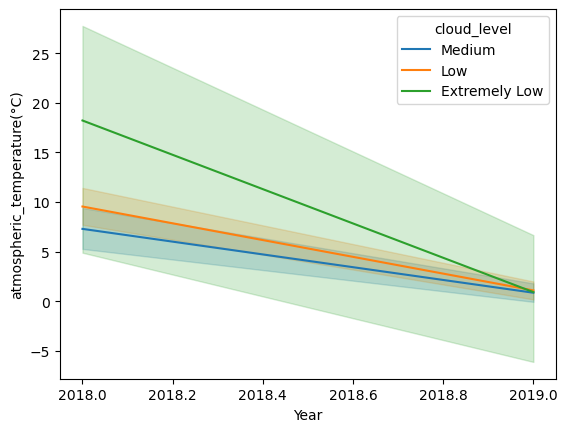

In [18]:
sns.lineplot(data = train_df, x = 'Year', y ='atmospheric_temperature(°C)', hue = 'cloud_level')

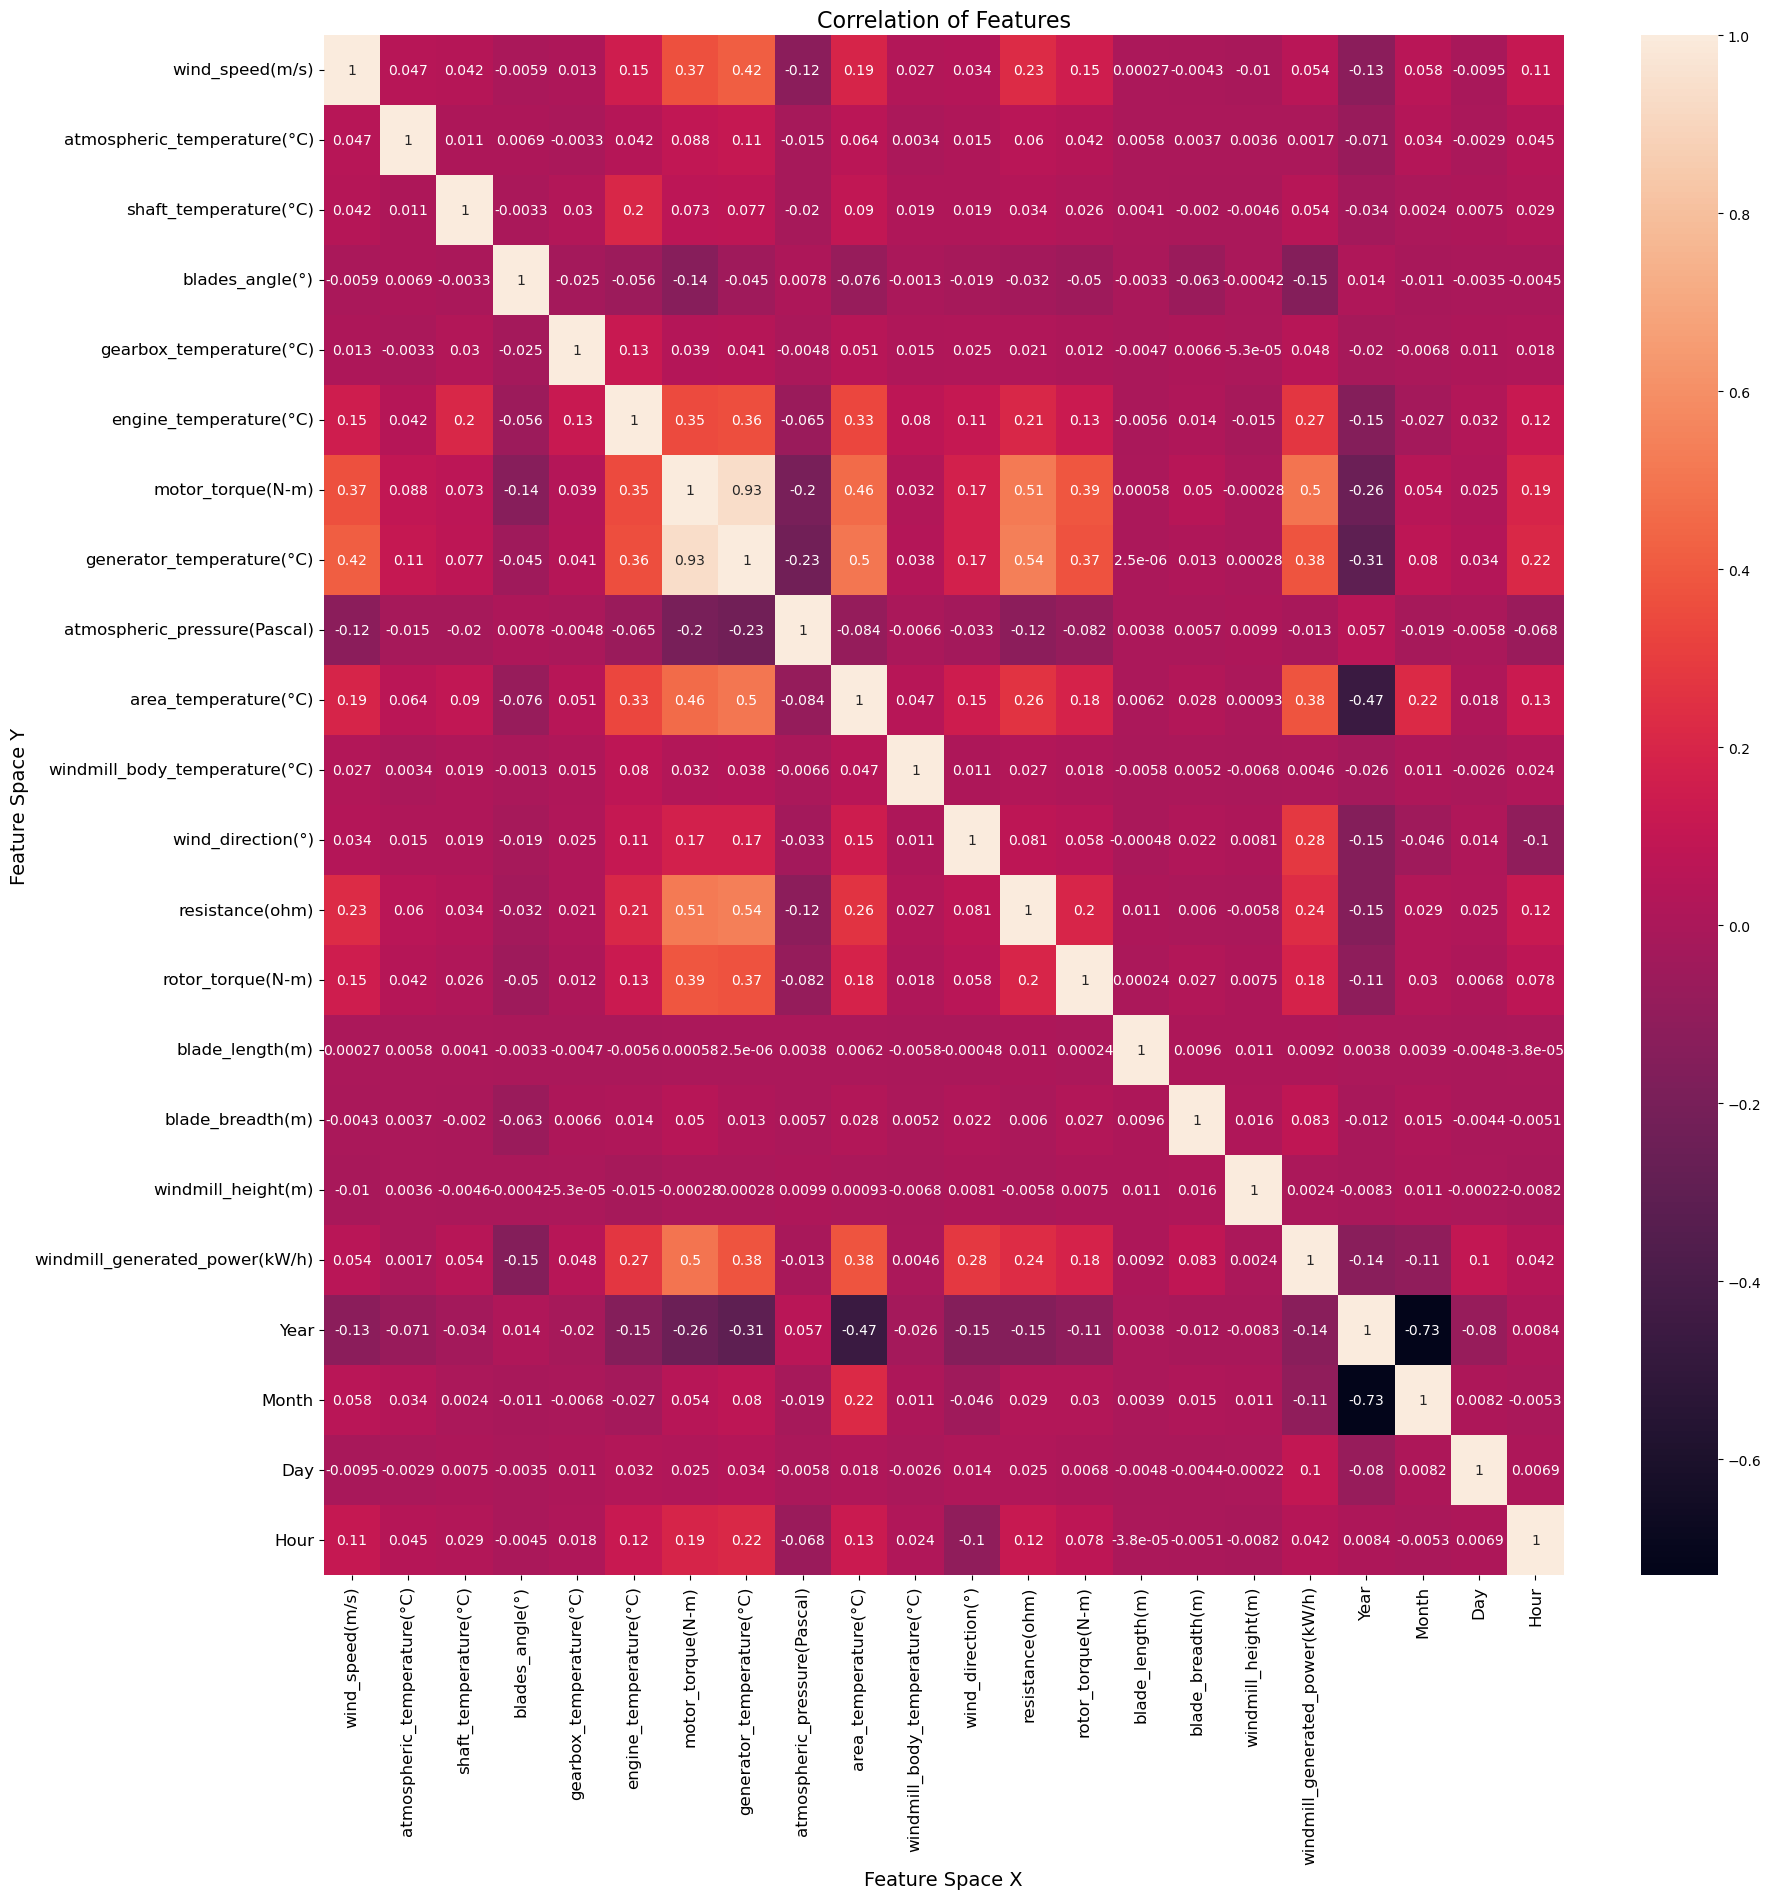

In [19]:
figure = plt.figure(figsize=[20, 20])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [20]:
train_df.drop(['datetime', 'tracking_id', 'cloud_level', 'turbine_status', 'Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)

In [21]:
train_df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,18004.731911,31.902948,43.997857,226.236363,1851.699486,43.076502,3.451530,0.458720,25.954383,7.102876
1,94.711791,-99.000000,-99.000000,5.060558,42.255446,40.209990,1984.417193,71.490737,17157.365775,30.893334,85.210171,253.762267,882.499288,33.916687,4.302109,0.359927,26.882495,4.927684
2,95.268257,16.156763,44.958045,0.138448,-46.043109,40.544919,2088.008555,70.842057,-395708.768539,44.515427,-99.000000,504.601626,1707.735010,36.806050,2.496350,0.346864,25.954383,4.952830
3,309.344194,16.447248,44.216279,-99.000000,41.137433,42.331889,2162.657844,70.735399,17206.921353,37.428052,44.052881,211.720491,1695.572571,36.772033,3.869691,0.327765,26.532459,4.112390
4,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,17242.773361,45.157833,45.045214,271.369294,1882.378939,-8.962226,4.726000,0.354647,27.595549,7.966535


wind_speed(m/s)


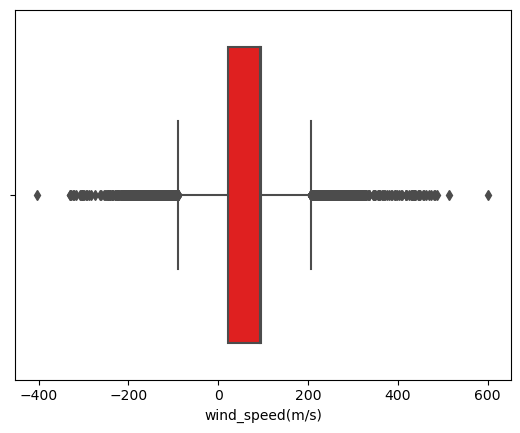

atmospheric_temperature(°C)


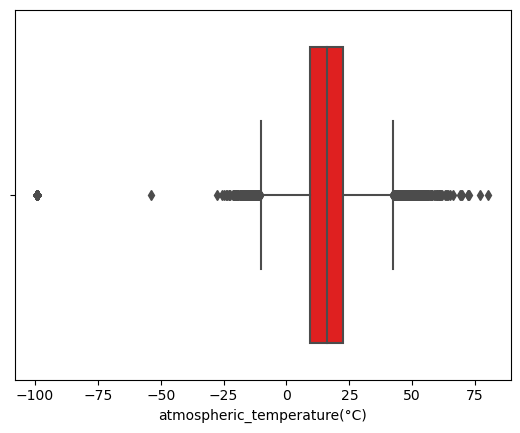

shaft_temperature(°C)


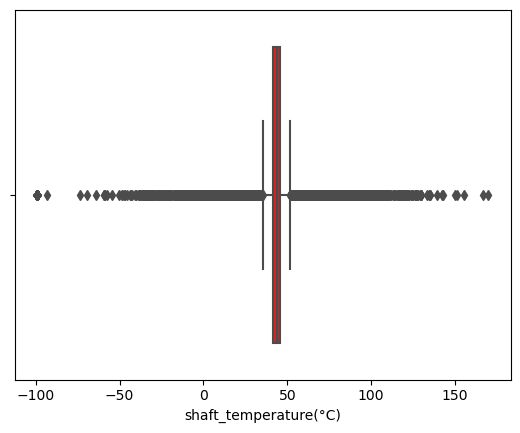

blades_angle(°)


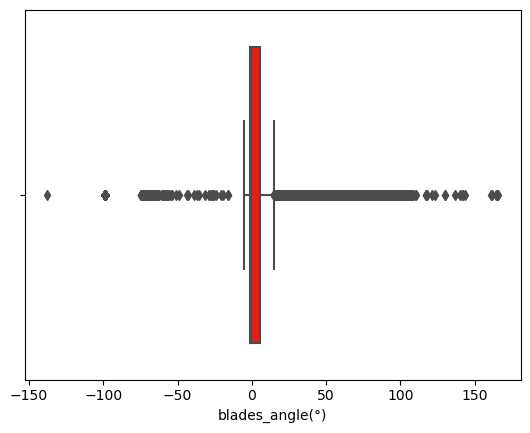

gearbox_temperature(°C)


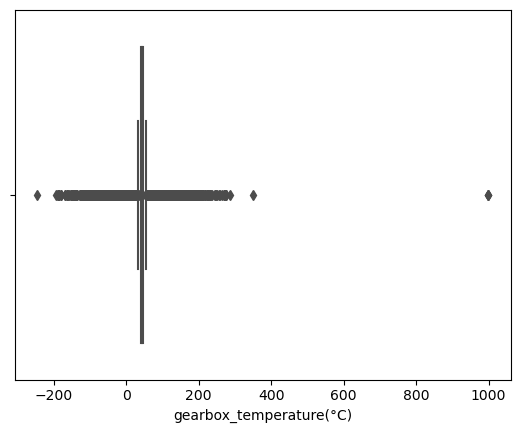

engine_temperature(°C)


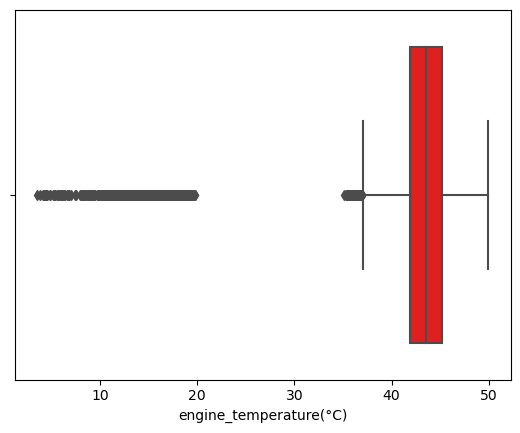

motor_torque(N-m)


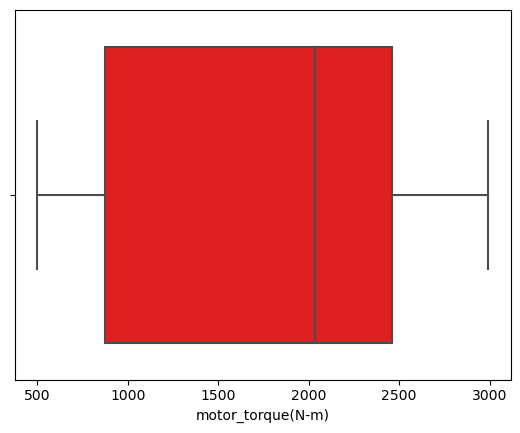

generator_temperature(°C)


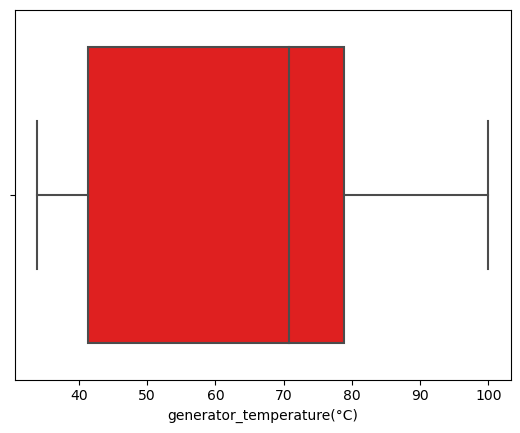

atmospheric_pressure(Pascal)


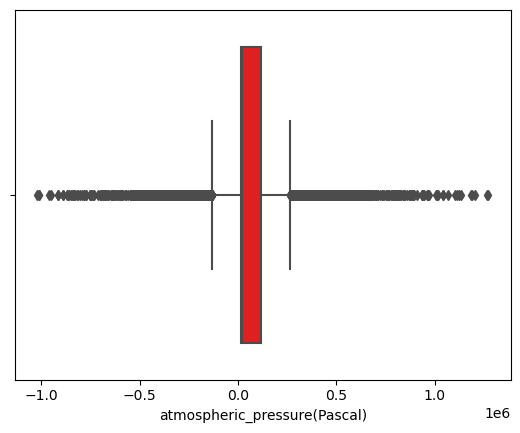

area_temperature(°C)


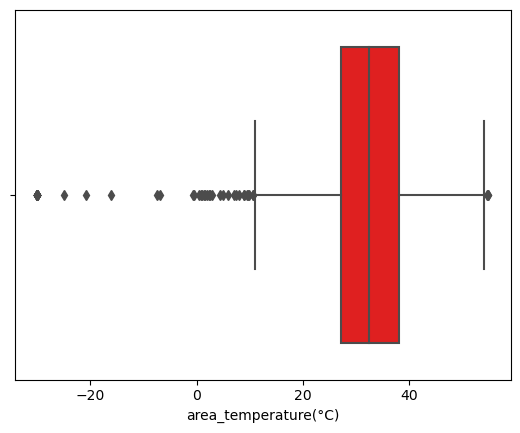

windmill_body_temperature(°C)


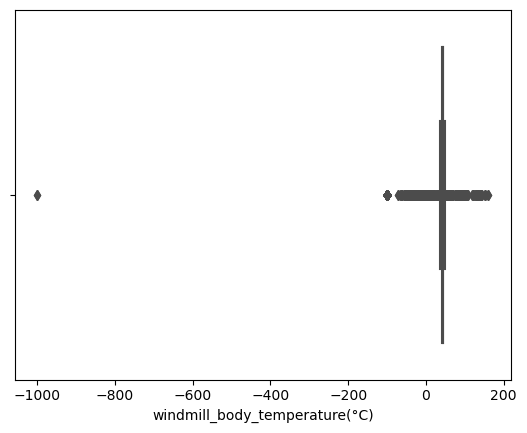

wind_direction(°)


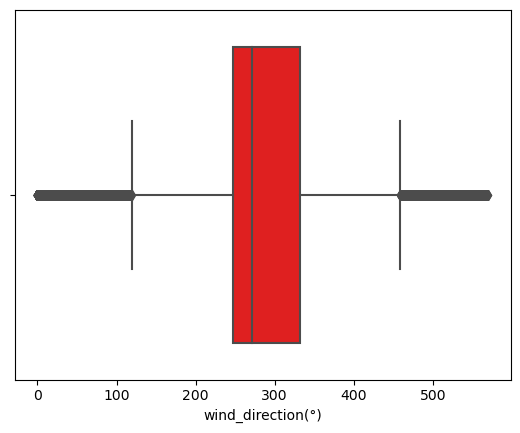

resistance(ohm)


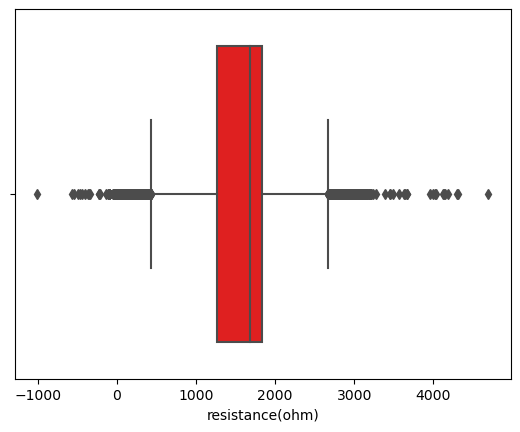

rotor_torque(N-m)


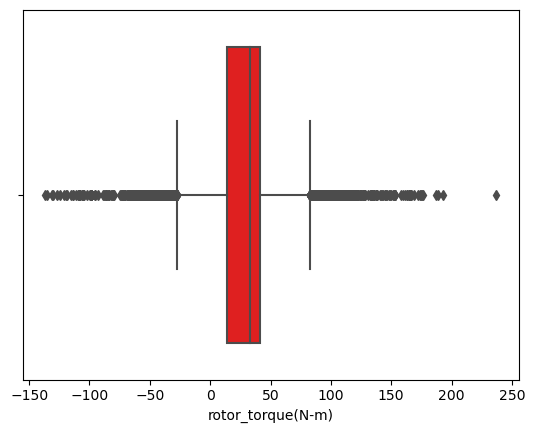

blade_length(m)


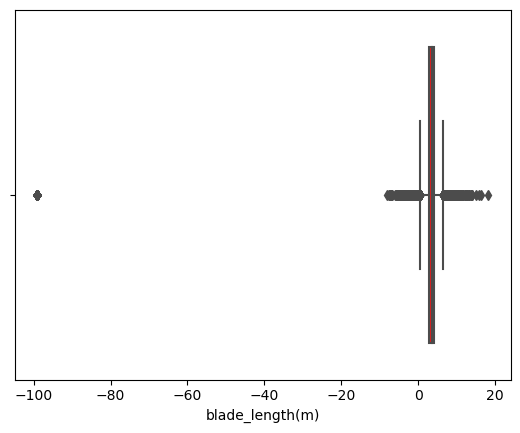

blade_breadth(m)


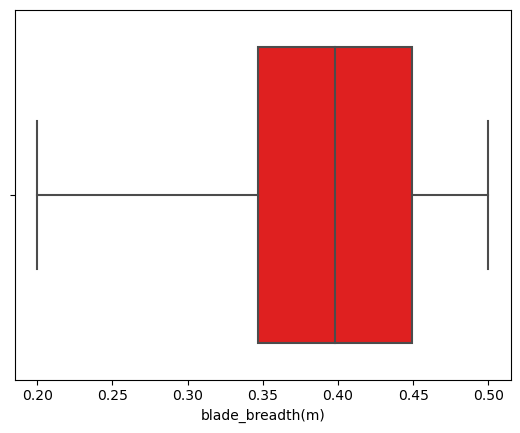

windmill_height(m)


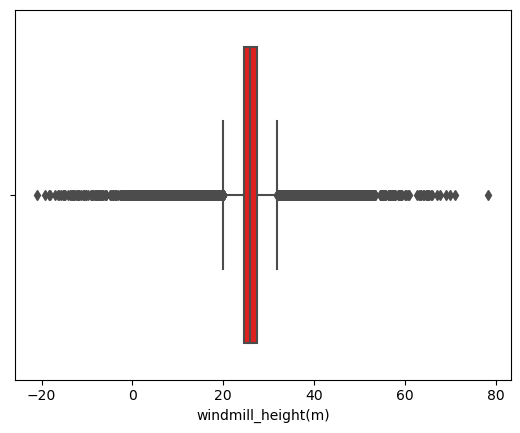

windmill_generated_power(kW/h)


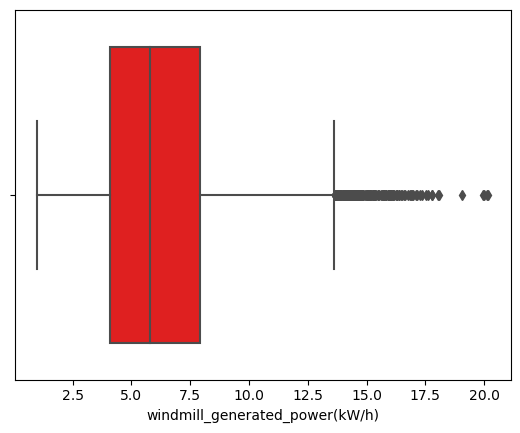

In [22]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [23]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

wind_speed(m/s)


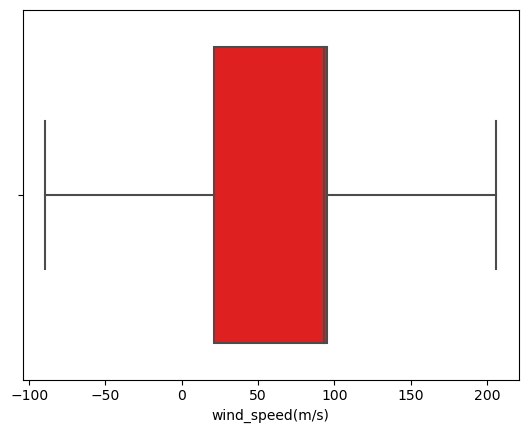

atmospheric_temperature(°C)


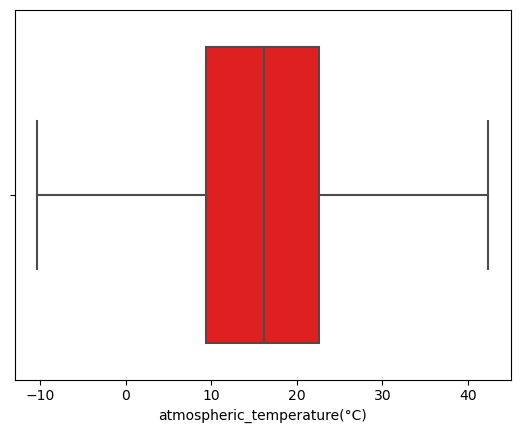

shaft_temperature(°C)


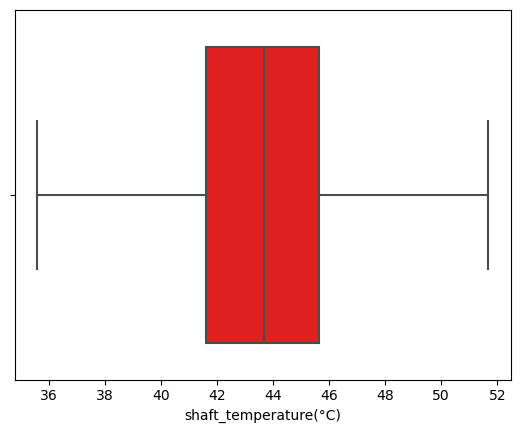

blades_angle(°)


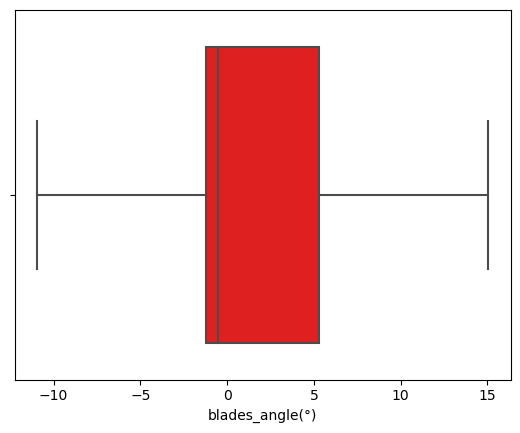

gearbox_temperature(°C)


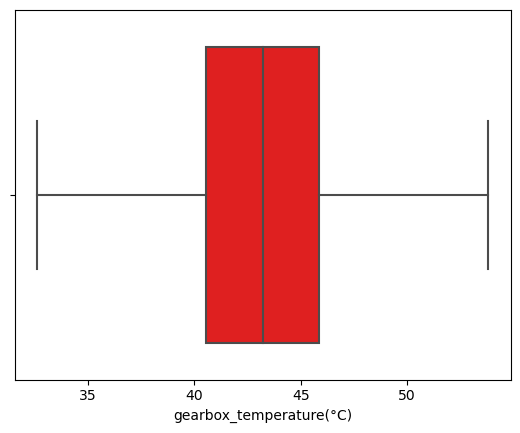

engine_temperature(°C)


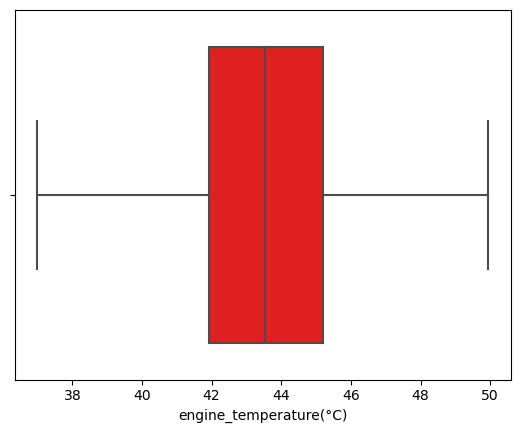

motor_torque(N-m)


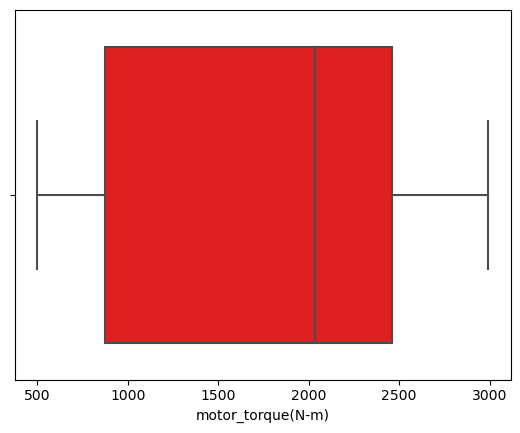

generator_temperature(°C)


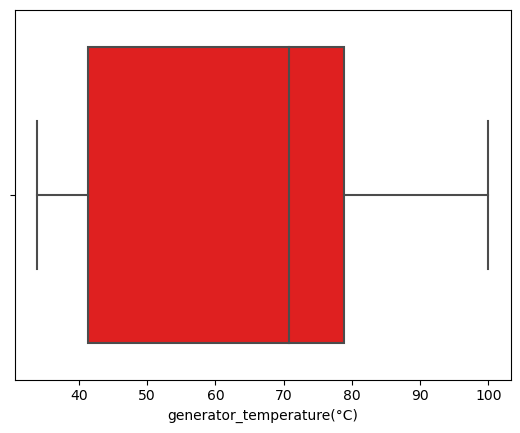

atmospheric_pressure(Pascal)


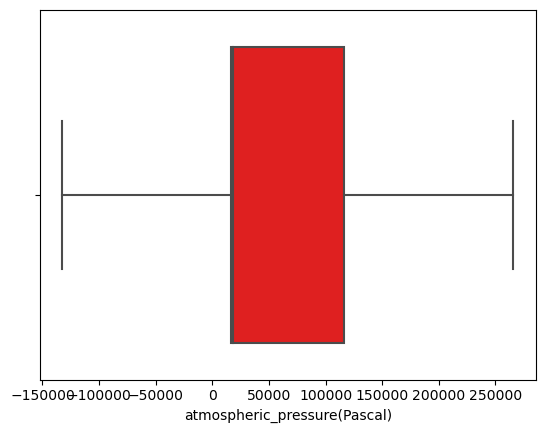

area_temperature(°C)


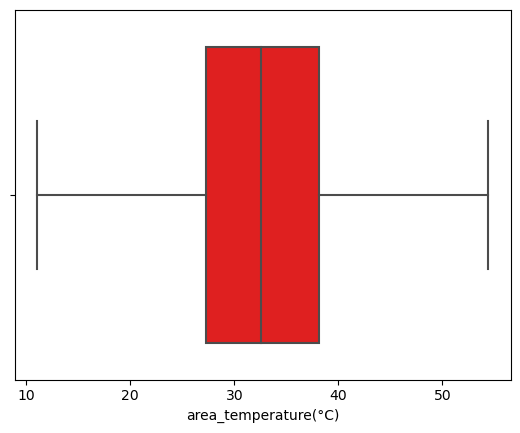

windmill_body_temperature(°C)


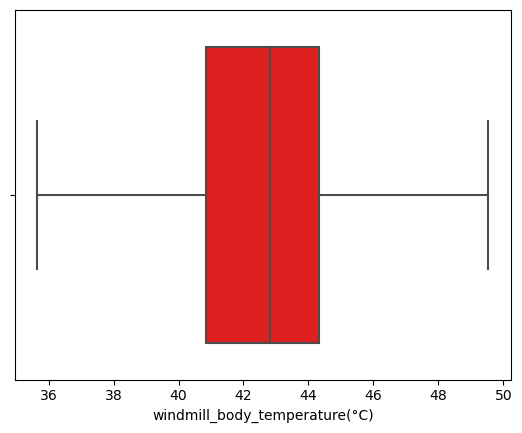

wind_direction(°)


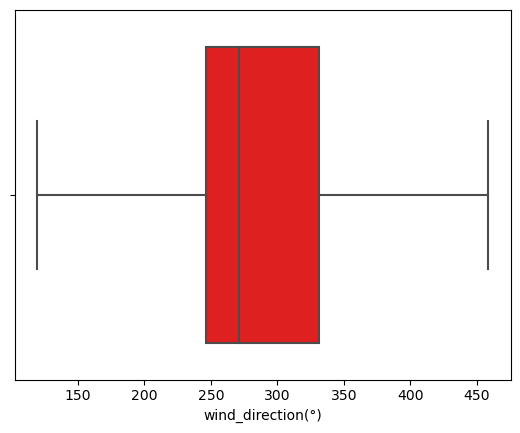

resistance(ohm)


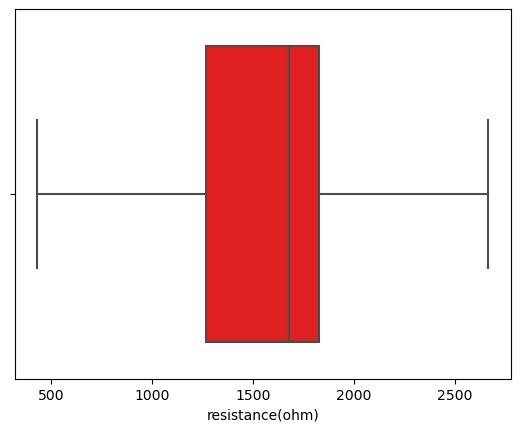

rotor_torque(N-m)


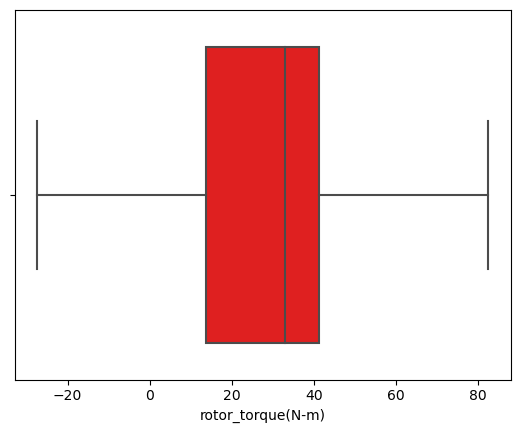

blade_length(m)


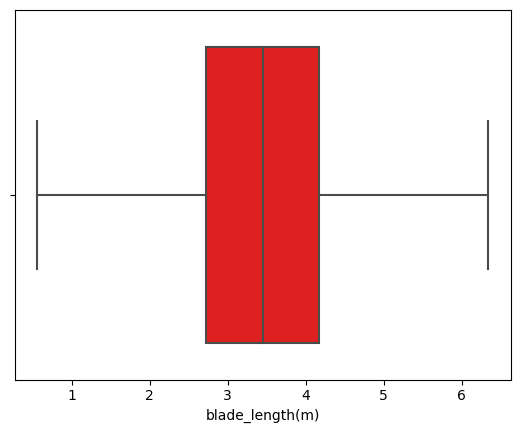

blade_breadth(m)


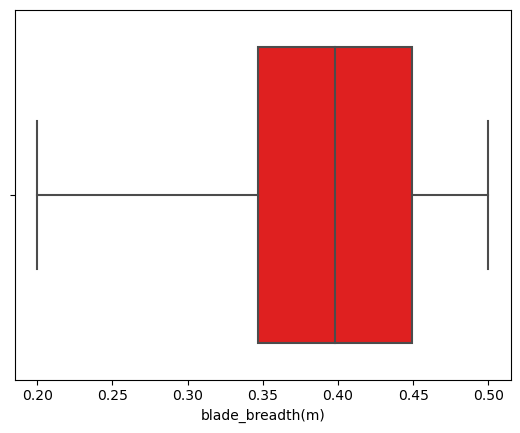

windmill_height(m)


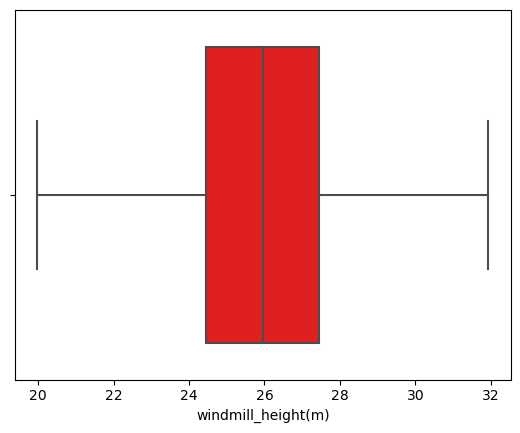

windmill_generated_power(kW/h)


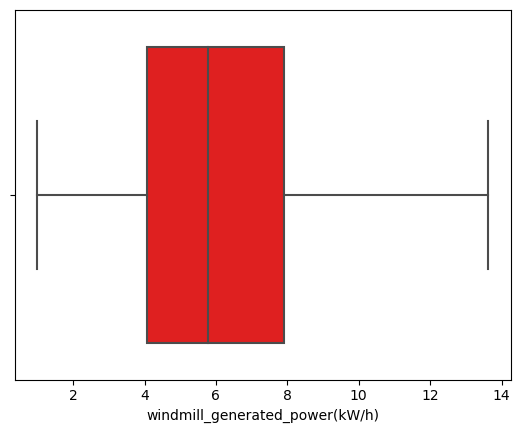

In [24]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [23]:
train_df['wind_speed(m/s)'] = np.log(train_df['wind_speed(m/s)'])
train_df['atmospheric_temperature(°C)'] = np.log(train_df['atmospheric_temperature(°C)'])
train_df['shaft_temperature(°C)'] = np.log(train_df['shaft_temperature(°C)'])
train_df['blades_angle(°)'] = np.log(train_df['blades_angle(°)'])
train_df['gearbox_temperature(°C)'] = np.log(train_df['gearbox_temperature(°C)'])
train_df['engine_temperature(°C)'] = np.log(train_df['engine_temperature(°C)'])
train_df['atmospheric_pressure(Pascal)'] = np.log(train_df['atmospheric_pressure(Pascal)'])
train_df['area_temperature(°C)'] = np.log(train_df['area_temperature(°C)'])
train_df['windmill_body_temperature(°C)'] = np.log(train_df['windmill_body_temperature(°C)'])
train_df['wind_direction(°)'] = np.log(train_df['wind_direction(°)'])
train_df['resistance(ohm)'] = np.log(train_df['resistance(ohm)'])
train_df['rotor_torque(N-m)'] = np.log(train_df['rotor_torque(N-m)'])
train_df['blade_length(m)'] = np.log(train_df['blade_length(m)'])
train_df['windmill_height(m)'] = np.log(train_df['shaft_temperature(°C)'])
train_df['windmill_generated_power(kW/h)'] = np.log(train_df['windmill_generated_power(kW/h)'])

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 19740 non-null  float64
 1   atmospheric_temperature(°C)     19740 non-null  float64
 2   shaft_temperature(°C)           19740 non-null  float64
 3   blades_angle(°)                 19740 non-null  float64
 4   gearbox_temperature(°C)         19740 non-null  float64
 5   engine_temperature(°C)          19740 non-null  float64
 6   motor_torque(N-m)               19740 non-null  float64
 7   generator_temperature(°C)       19740 non-null  float64
 8   atmospheric_pressure(Pascal)    19740 non-null  float64
 9   area_temperature(°C)            19740 non-null  float64
 10  windmill_body_temperature(°C)   19740 non-null  float64
 11  wind_direction(°)               19740 non-null  float64
 12  resistance(ohm)                 

In [26]:
train_df['wind_speed(m/s)'].fillna(train_df['wind_speed(m/s)'].median(), inplace = True)
train_df['atmospheric_temperature(°C)'].fillna(train_df['atmospheric_temperature(°C)'].median(), inplace = True)
train_df['shaft_temperature(°C)'].fillna(train_df['shaft_temperature(°C)'].median(), inplace = True)
train_df['blades_angle(°)'].fillna(train_df['blades_angle(°)'].median(), inplace = True)
train_df['gearbox_temperature(°C)'].fillna(train_df['gearbox_temperature(°C)'].median(), inplace = True)


train_df['atmospheric_pressure(Pascal)'].fillna(train_df['atmospheric_pressure(Pascal)'].median(), inplace = True)
train_df['area_temperature(°C)'].fillna(train_df['area_temperature(°C)'].median(), inplace = True)
train_df['windmill_body_temperature(°C)'].fillna(train_df['windmill_body_temperature(°C)'].median(), inplace = True)
train_df['wind_direction(°)'].fillna(train_df['wind_direction(°)'].median(), inplace = True)
train_df['resistance(ohm)'].fillna(train_df['resistance(ohm)'].median(), inplace = True)
train_df['rotor_torque(N-m)'].fillna(train_df['rotor_torque(N-m)'].median(), inplace = True)
train_df['blade_length(m)'].fillna(train_df['blade_length(m)'].median(), inplace = True)
train_df['windmill_height(m)'].fillna(train_df['windmill_height(m)'].median(), inplace = True)
train_df['windmill_generated_power(kW/h)'].fillna(train_df['windmill_generated_power(kW/h)'].median(), inplace = True)


In [26]:
df_train.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,18004.731911,31.902948,43.997857,226.236363,1851.699486,43.076502,3.451530,0.458720,25.954383,7.102876
1,94.711791,-10.334413,35.602007,5.060558,42.255446,40.209990,1984.417193,71.490737,17157.365775,30.893334,49.535119,253.762267,882.499288,33.916687,4.302109,0.359927,26.882495,4.927684
2,95.268257,16.156763,44.958045,0.138448,32.616700,40.544919,2088.008555,70.842057,-132389.550919,44.515427,35.656942,458.620353,1707.735010,36.806050,2.496350,0.346864,25.954383,4.952830
3,205.982202,16.447248,44.216279,-10.937807,41.137433,42.331889,2162.657844,70.735399,17206.921353,37.428052,44.052881,211.720491,1695.572571,36.772033,3.869691,0.327765,26.532459,4.112390
4,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,17242.773361,45.157833,45.045214,271.369294,1882.378939,-8.962226,4.726000,0.354647,27.595549,7.966535


In [27]:
df_train = df_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Train-Test Split :

In [28]:
x = df_train.drop('windmill_generated_power(kW/h)', axis = 1)
y = df_train['windmill_generated_power(kW/h)']

In [29]:
x

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
0,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,18004.731911,31.902948,43.997857,226.236363,1851.699486,43.076502,3.451530,0.458720,25.954383
1,94.711791,-10.334413,35.602007,5.060558,42.255446,40.209990,1984.417193,71.490737,17157.365775,30.893334,49.535119,253.762267,882.499288,33.916687,4.302109,0.359927,26.882495
2,95.268257,16.156763,44.958045,0.138448,32.616700,40.544919,2088.008555,70.842057,-132389.550919,44.515427,35.656942,458.620353,1707.735010,36.806050,2.496350,0.346864,25.954383
3,205.982202,16.447248,44.216279,-10.937807,41.137433,42.331889,2162.657844,70.735399,17206.921353,37.428052,44.052881,211.720491,1695.572571,36.772033,3.869691,0.327765,26.532459
4,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,17242.773361,45.157833,45.045214,271.369294,1882.378939,-8.962226,4.726000,0.354647,27.595549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,-89.343366,42.378076,45.031291,4.022437,32.616700,43.412851,2687.670267,93.135127,265714.014437,43.594197,47.776882,119.574937,1921.954906,41.293931,3.451530,0.300051,24.573042
19736,95.854671,25.408621,51.677124,-10.937807,46.635625,42.547409,2327.510330,79.837357,18378.055318,38.741247,45.440138,420.503716,1805.817409,39.089313,2.650940,0.448335,27.770454
19737,101.977143,16.156763,42.775058,0.851994,44.934351,44.713309,2042.373482,72.615407,17316.925775,36.320718,44.184693,458.620353,1693.598178,36.125706,3.451530,0.469758,19.978631
19738,93.382523,17.375045,43.028730,-1.196709,32.616700,46.327066,2158.935324,75.194611,17190.731675,32.269551,42.720776,287.316787,1744.369476,37.927900,0.559208,0.497128,19.978631


In [30]:
y

0        7.102876
1        4.927684
2        4.952830
3        4.112390
4        7.966535
           ...   
19735    9.383830
19736    6.731125
19737    3.904385
19738    5.849470
19739    5.796474
Name: windmill_generated_power(kW/h), Length: 19740, dtype: float64

# Feature Selection :

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.06
Important Features: ['blades_angle(°)', 'motor_torque(N-m)', 'atmospheric_pressure(Pascal)']


# Feature Importance :

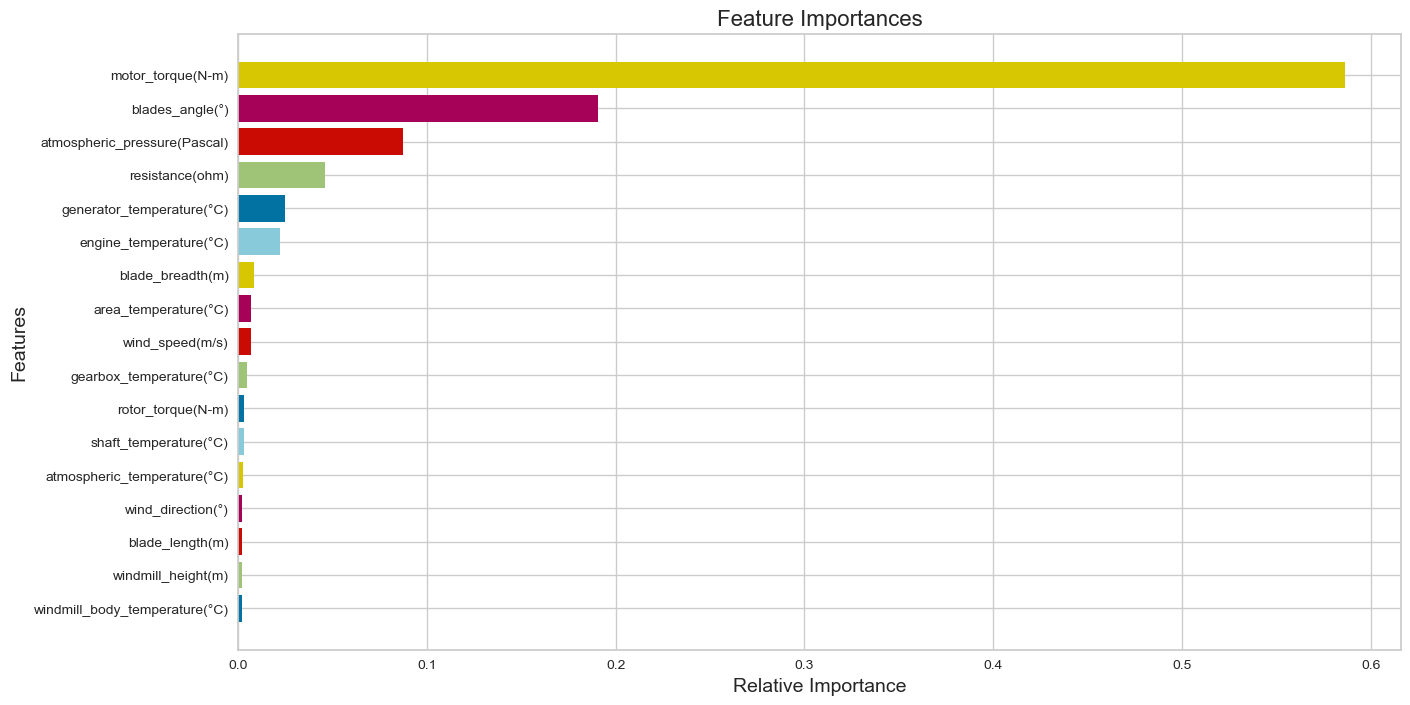

In [32]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

In [ ]:
'wind_speed(m/s)'
'generator_temperature(°C)'
'blade_breadth(m)'

In [33]:
x.drop(['wind_speed(m/s)', 'generator_temperature(°C)', 'blade_breadth(m)','engine_temperature(°C)','area_temperature(°C)', 'wind_direction(°)', 'gearbox_temperature(°C)', 'blade_length(m)', 'atmospheric_temperature(°C)',
       'rotor_torque(N-m)', 'windmill_body_temperature(°C)', 'windmill_height(m)', 'shaft_temperature(°C)',], axis = 1, inplace = True)

In [34]:
x

,blades_angle(°),motor_torque(N-m),atmospheric_pressure(Pascal),resistance(ohm)
0,-1.108194,2539.820006,18004.731911,1851.699486
1,5.060558,1984.417193,17157.365775,882.499288
2,0.138448,2088.008555,-132389.550919,1707.735010
3,-10.937807,2162.657844,17206.921353,1695.572571
4,-1.027115,2618.577149,17242.773361,1882.378939
...,...,...,...,...
19735,4.022437,2687.670267,265714.014437,1921.954906
19736,-10.937807,2327.510330,18378.055318,1805.817409
19737,0.851994,2042.373482,17316.925775,1693.598178
19738,-1.196709,2158.935324,17190.731675,1744.369476


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30,shuffle = True,  random_state = 42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13818, 4)
(5922, 4)
(13818,)
(5922,)


In [37]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [38]:
x_train_ = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling :

# Linear Regression :

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation :**

In [40]:
y_pred_lin_train = lin_reg.predict(x_train)
y_pred_lin_test = lin_reg.predict(x_test)

In [41]:
#R2 score on train dataset
R2_score_Linear_train = metrics.r2_score(y_train, y_pred_lin_train)
R2_score_Linear_train

0.2703888755987689

In [42]:
#R2 score on test dataset
R2_score_Linear_test = metrics.r2_score(y_test, y_pred_lin_test)
R2_score_Linear_test

-1.1800320105798066

# Decision Tree Regressor :

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

**Model Evaluation :**

In [44]:
y_pred_dtree_train = dtree.predict(x_train)
y_pred_dtree_test = dtree.predict(x_test)

In [45]:
#R2 score on train dataset
R2_score_dtree_train = metrics.r2_score(y_train, y_pred_dtree_train)
R2_score_dtree_train

0.9999161411649478

In [46]:
#R2 score on test dataset
R2_score_dtree_test = metrics.r2_score(y_test, y_pred_dtree_test)
R2_score_dtree_test

-1.4040548715505157

# Ada Boost Regressor :

In [47]:
from sklearn.ensemble import AdaBoostRegressor

ada_tree = AdaBoostRegressor(base_estimator = dtree)
ada_tree.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

**Model Evaluation :**

In [48]:
y_pred_ada_train = ada_tree.predict(x_train)
y_pred_ada_test = ada_tree.predict(x_test)

In [49]:
#R2 score on train dataset
R2_score_adaTree_train = metrics.r2_score(y_train, y_pred_ada_train)
R2_score_adaTree_train

0.9980989770736204

In [50]:
#R2 score on test dataset
R2_score_adaTree_test = metrics.r2_score(y_test, y_pred_ada_test)
R2_score_adaTree_test

-1.1917758611070144

# Random Forest Regressor :

In [51]:
from sklearn.ensemble import RandomForestRegressor

clf_rand = RandomForestRegressor()
clf_rand.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation :**

In [52]:
y_pred_rf_train = clf_rand.predict(x_train)
y_pred_rf_test = clf_rand.predict(x_test)

In [53]:
#R2 score on train dataset
R2_score_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
R2_score_rf_train

0.9918254909857298

In [54]:
#R2 score on test dataset
R2_score_rf_test = metrics.r2_score(y_test, y_pred_rf_test)
R2_score_rf_test

-0.9929880234073574

# Bagging Regressor :

In [55]:
clf_bag = RandomForestRegressor()

In [56]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(base_estimator = clf_bag, n_estimators = 30)
bag_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=30)

**Model Evaluation :**

In [57]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

In [58]:
#R2 score on train dataset
R2_score_bag_train = metrics.r2_score(y_train, y_pred_bag_train)
R2_score_bag_train

0.9795147317279619

In [59]:
#R2 score on test dataset
R2_score_bag_test = metrics.r2_score(y_test, y_pred_bag_test)
R2_score_bag_test

-0.8608246565709041

# Hyper Parameter tuning on Random Forest :

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [63]:
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [64]:
grid_rand = GridSearchCV(clf_rand, param_grid, cv = 5, n_jobs = -1, verbose = 3)
grid_rand.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=3)

In [65]:
final_moodel = grid_rand.best_estimator_
final_moodel

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=8,
                      n_estimators=30)

In [66]:
clf_rand = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=8,
                      n_estimators=30)
clf_rand.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=8,
                      n_estimators=30)

**Model Evaluation :**

In [67]:
y_pred_RandF_train = clf_rand.predict(x_train)
y_pred_RandF_test = clf_rand.predict(x_test)

In [68]:
#R2 score on train dataset
R2_score_GridR_train = metrics.r2_score(y_train, y_pred_RandF_train)
R2_score_GridR_train

0.9910987813827639

In [69]:
#R2 score on test dataset
R2_score_GridR_test = metrics.r2_score(y_test, y_pred_RandF_test)
R2_score_GridR_test

-1.0897381577233323

<AxesSubplot:xlabel='windmill_generated_power(kW/h)'>

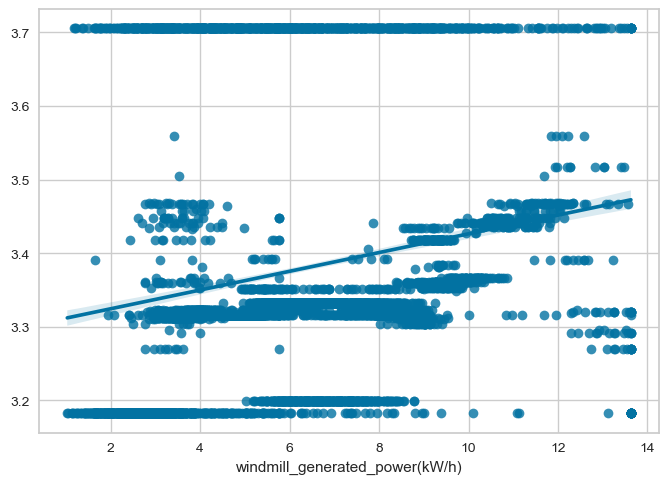

In [70]:
sns.regplot(y_test, y_pred_RandF_test)

# KNeighbors :

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

**Model Evaluation :**

In [73]:
y_pred_kn_train = knn.predict(x_train)
y_pred_kn_test = knn.predict(x_test)

In [74]:
#R2 score on train dataset
R2_score_Knn_train = metrics.r2_score(y_train, y_pred_kn_train)
R2_score_Knn_train

0.9221107650731083

In [75]:
#R2 score on test dataset
R2_score_Knn_test = metrics.r2_score(y_test, y_pred_kn_test)
R2_score_Knn_test

-1.1674331123341135

# XGBRegressor :

In [76]:
import xgboost as xgb

In [77]:
xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**Model Evaluation :**

In [78]:
y_pred_xg_train = xgb_cl.predict(x_train)
y_pred_xg_test = xgb_cl.predict(x_test)

In [79]:
#R2 score on train dataset
R2_score_xg_train = metrics.r2_score(y_train, y_pred_xg_train)
R2_score_xg_train

0.9804107206719261

In [80]:
#R2 score on test dataset
R2_score_xg_test = metrics.r2_score(y_test, y_pred_xg_test)
R2_score_xg_test

-2.402809725504027

In [81]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'GridSearch(RandF)', 'Bagging Regressor', 'KNeighbors', 'XGBoost Regressor'],
                       'Training R2_Score': [R2_score_Linear_train, R2_score_dtree_train, R2_score_adaTree_train,
                                         R2_score_rf_train, R2_score_bag_train, R2_score_GridR_train, R2_score_Knn_train,
                                            R2_score_xg_train],
                       
                       'Testing R2_Score': [R2_score_Linear_test, R2_score_dtree_test, R2_score_adaTree_test, R2_score_rf_test, R2_score_bag_test, R2_score_GridR_test,
                                        R2_score_Knn_test, R2_score_xg_test]})
models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,Decision Tree Regressor,0.999916,-1.404055
1,ADABoost Regressor,0.998099,-1.191776
2,Random Forest Regressor,0.991825,-0.992988
3,Bagging Regressor,0.991099,-1.089738
4,XGBoost Regressor,0.980411,-2.402810
5,GridSearch(RandF),0.979515,-0.860825
6,KNeighbors,0.922111,-1.167433
7,Linear Regressor,0.270389,-1.180032


# Kfold Cross Validation :

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [83]:
Regressors = []

Regressors.append(LinearRegression())
Regressors.append(DecisionTreeRegressor())
Regressors.append(AdaBoostRegressor())
Regressors.append(RandomForestRegressor())
Regressors.append(BaggingRegressor(n_estimators = 30))
Regressors.append(RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=8,
                      n_estimators=30))
Regressors.append(KNeighborsRegressor(n_neighbors= 3))
Regressors.append(xgb.XGBRegressor())


In [84]:
cv_results = []

for Regressor in Regressors:
    cv_results.append(cross_val_score(Regressor, x_train, y_train, scoring = 'r2', cv = 5))

In [85]:
cv_results

[array([0.27619473, 0.29019437, 0.25805599, 0.27833666, 0.24253279]),
 array([0.90570892, 0.88731975, 0.90167597, 0.89285831, 0.88263081]),
 array([0.80673403, 0.79859166, 0.78681746, 0.80409797, 0.77333106]),
 array([0.93939745, 0.94155094, 0.93647138, 0.94902715, 0.93352453]),
 array([0.94089482, 0.94058366, 0.93549476, 0.94760693, 0.93188362]),
 array([0.94213796, 0.94413315, 0.93696209, 0.95131779, 0.93727394]),
 array([0.82843483, 0.84690026, 0.81824672, 0.83085742, 0.81441891]),
 array([0.94022003, 0.93948982, 0.94046412, 0.94930613, 0.93394129])]

In [86]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [87]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'GridSearch(RandF)', 'Bagging Regressor', 'KNeighbors', 'XGBoost Regressor']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.942365,0.005262,Bagging Regressor
1,0.940684,0.004929,XGBoost Regressor
2,0.939994,0.005266,Random Forest Regressor
3,0.939293,0.005342,GridSearch(RandF)
4,0.894039,0.008616,Decision Tree Regressor
5,0.827772,0.011357,KNeighbors
6,0.793914,0.012361,ADABoost Regressor
7,0.269063,0.016783,Linear Regressor


# Tuning on Bagging Regressor :

In [88]:
Bag_reg = BaggingRegressor(n_estimators  = 30)

In [89]:
parameters = {
    'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

In [90]:
grid_bagging = GridSearchCV(Bag_reg, parameters, cv = 5, verbose = 1, scoring = 'r2', n_jobs = 1)
grid_bagging.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(n_estimators=30), n_jobs=1,
             param_grid={'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]},
             scoring='r2', verbose=1)

In [92]:
final_bagg = grid_bagging.best_estimator_
final_bagg

BaggingRegressor(n_estimators=900)

In [93]:
print("Best parameters:", grid_bagging.best_params_)
print("Lowest RMSE: ", (grid_bagging.best_score_)**(1/2.0))

Best parameters: {'n_estimators': 900}
Lowest RMSE:  0.9699292266984395


In [94]:
Bag_reg = BaggingRegressor(n_estimators  = 900)

In [95]:
Bag_reg.fit(x_train, y_train)

BaggingRegressor(n_estimators=900)

**Model Evaluation :**

In [96]:
y_train_BagG_count = Bag_reg.predict(x_train)
y_test_BagG_count = Bag_reg.predict(x_test)

In [97]:
#R2 score on train dataset
R2_score_BagG_train = metrics.r2_score(y_train, y_train_BagG_count)
R2_score_BagG_train

0.9921072360456158

In [98]:
#R2 score on test dataset
R2_score_BagG_test = metrics.r2_score(y_test, y_test_BagG_count)
R2_score_BagG_test

-0.8362583004655015

<AxesSubplot:xlabel='windmill_generated_power(kW/h)'>

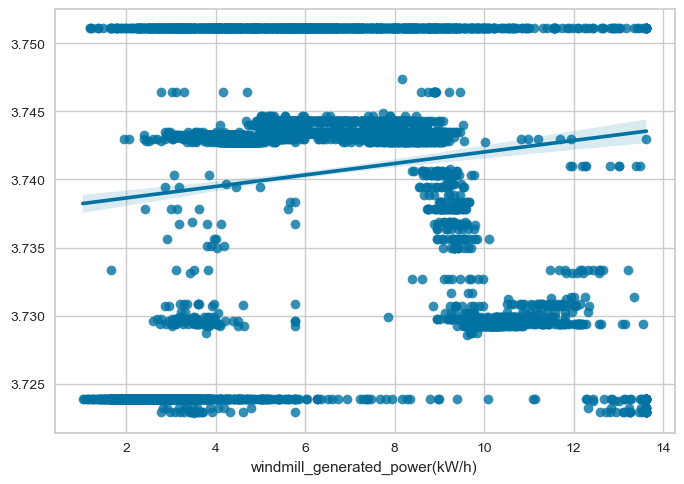

In [99]:
sns.regplot(y_test, y_test_BagG_count)

In [100]:
test_df = pd.read_csv('test.csv')

In [101]:
test_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_2755,2018-11-24 03:03:20,96.889586,19.808427,74.891389,43.691961,43.796380,41.470878,1096.349402,71.848627,...,41.500572,46.578545,NaN,641.241639,22.290617,AAA,Medium,3.167128,0.405856,30.951408
1,WM_26248,2019-06-09 04:33:20,10.099765,1.766143,11.586161,-99.000000,13.967744,11.952156,534.155038,38.107687,...,21.415270,14.283726,269.633949,1163.903620,5.933251,D,Low,2.241607,0.435511,26.358272
2,WM_35386,2019-08-16 21:13:20,94.395591,24.185922,44.141326,-0.395538,45.613177,45.037685,2875.042178,81.796214,...,31.753474,43.835150,230.918310,1929.490567,42.364788,A2,Low,2.535245,0.469745,23.800160
3,WM_6623,2018-12-24 17:13:20,98.541350,34.084521,44.686674,9.661323,48.121819,47.945314,2777.902185,93.732182,...,41.890847,48.395485,9.185540,1990.390425,-99.000000,BCB,Low,-0.282802,0.454365,25.724865
4,WM_23787,2019-05-20 04:03:20,11.805697,1.447166,13.396429,1.606224,15.527894,12.046752,759.937716,38.269123,...,22.930779,-99.000000,283.603119,1188.233330,12.044749,B2,Low,NaN,0.391088,27.713308


In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8460 entries, 0 to 8459
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    8460 non-null   object 
 1   datetime                       8460 non-null   object 
 2   wind_speed(m/s)                8374 non-null   float64
 3   atmospheric_temperature(°C)    7455 non-null   float64
 4   shaft_temperature(°C)          8460 non-null   float64
 5   blades_angle(°)                8390 non-null   float64
 6   gearbox_temperature(°C)        8460 non-null   float64
 7   engine_temperature(°C)         8456 non-null   float64
 8   motor_torque(N-m)              8455 non-null   float64
 9   generator_temperature(°C)      8457 non-null   float64
 10  atmospheric_pressure(Pascal)   7671 non-null   float64
 11  area_temperature(°C)           8460 non-null   float64
 12  windmill_body_temperature(°C)  7755 non-null   f

In [103]:
test_df.drop(['datetime', 'cloud_level', 'turbine_status'], axis = 1, inplace = True)

In [104]:
test_df.isna().sum()

tracking_id                         0
wind_speed(m/s)                    86
atmospheric_temperature(°C)      1005
shaft_temperature(°C)               0
blades_angle(°)                    70
gearbox_temperature(°C)             0
engine_temperature(°C)              4
motor_torque(N-m)                   5
generator_temperature(°C)           3
atmospheric_pressure(Pascal)      789
area_temperature(°C)                0
windmill_body_temperature(°C)     705
wind_direction(°)                1535
resistance(ohm)                     0
rotor_torque(N-m)                 181
blade_length(m)                  1547
blade_breadth(m)                    0
windmill_height(m)                175
dtype: int64

In [105]:
test_df['wind_speed(m/s)'].fillna(test_df['wind_speed(m/s)'].median(), inplace = True)
test_df['atmospheric_temperature(°C)'].fillna(test_df['atmospheric_temperature(°C)'].median(), inplace = True)
test_df['blades_angle(°)'].fillna(test_df['blades_angle(°)'].median(), inplace = True)
test_df['engine_temperature(°C)'].fillna(test_df['engine_temperature(°C)'].median(), inplace = True)
test_df['motor_torque(N-m)'].fillna(test_df['motor_torque(N-m)'].median(), inplace = True)
test_df['generator_temperature(°C)'].fillna(test_df['generator_temperature(°C)'].median(), inplace = True)
test_df['atmospheric_pressure(Pascal)'].fillna(test_df['atmospheric_pressure(Pascal)'].median(), inplace = True)
test_df['windmill_body_temperature(°C)'].fillna(test_df['windmill_body_temperature(°C)'].median(), inplace = True)
test_df['wind_direction(°)'].fillna(test_df['wind_direction(°)'].median(), inplace = True)
test_df['rotor_torque(N-m)'].fillna(test_df['rotor_torque(N-m)'].median(), inplace = True)
test_df['blade_length(m)'].fillna(test_df['blade_length(m)'].median(), inplace = True)
test_df['windmill_height(m)'].fillna(test_df['windmill_height(m)'].median(), inplace = True)

In [106]:
test_df.isna().sum()

tracking_id                      0
wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
dtype: int64

In [107]:
test_df.head()

,tracking_id,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_2755,96.889586,19.808427,74.891389,43.691961,43.796380,41.470878,1096.349402,71.848627,16531.411599,41.500572,46.578545,271.503216,641.241639,22.290617,3.167128,0.405856,30.951408
1,WM_26248,10.099765,1.766143,11.586161,-99.000000,13.967744,11.952156,534.155038,38.107687,565239.057147,21.415270,14.283726,269.633949,1163.903620,5.933251,2.241607,0.435511,26.358272
2,WM_35386,94.395591,24.185922,44.141326,-0.395538,45.613177,45.037685,2875.042178,81.796214,17408.104397,31.753474,43.835150,230.918310,1929.490567,42.364788,2.535245,0.469745,23.800160
3,WM_6623,98.541350,34.084521,44.686674,9.661323,48.121819,47.945314,2777.902185,93.732182,18191.550526,41.890847,48.395485,9.185540,1990.390425,-99.000000,-0.282802,0.454365,25.724865
4,WM_23787,11.805697,1.447166,13.396429,1.606224,15.527894,12.046752,759.937716,38.269123,113284.111693,22.930779,-99.000000,283.603119,1188.233330,12.044749,3.458879,0.391088,27.713308


In [108]:
test_df = test_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

wind_speed(m/s)


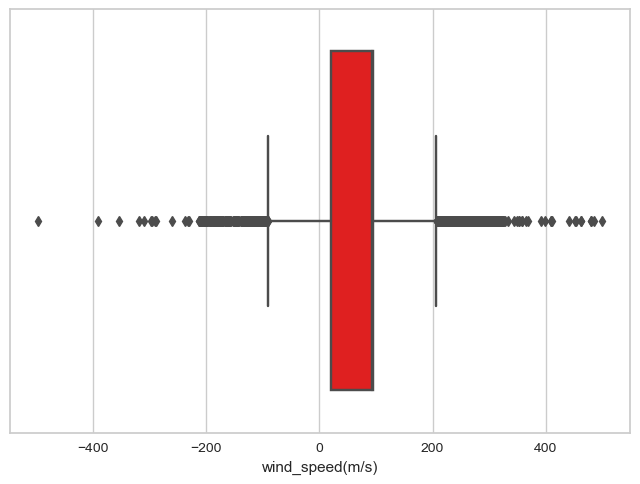

atmospheric_temperature(°C)


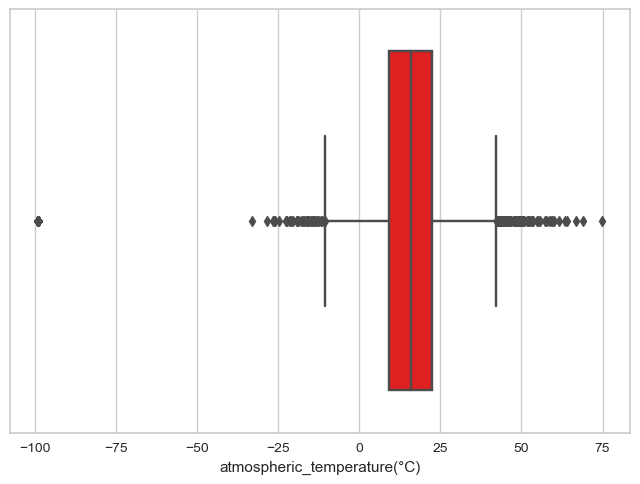

shaft_temperature(°C)


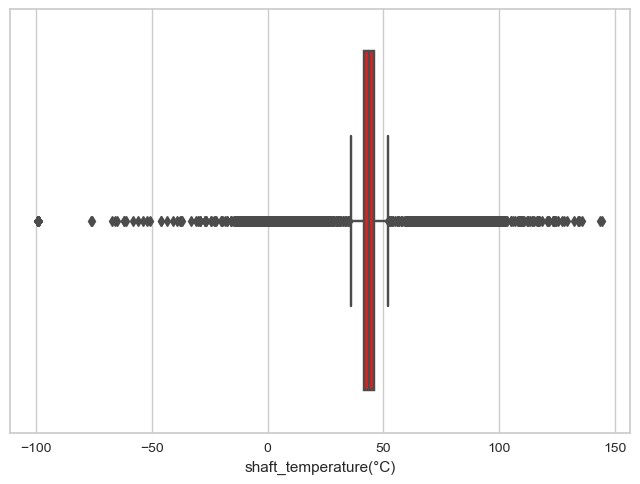

blades_angle(°)


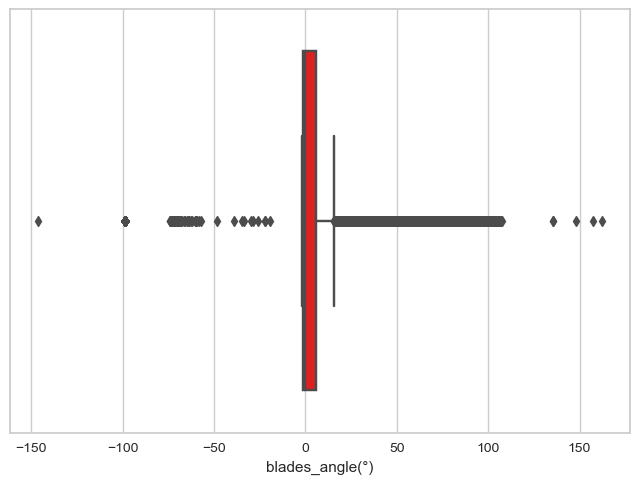

gearbox_temperature(°C)


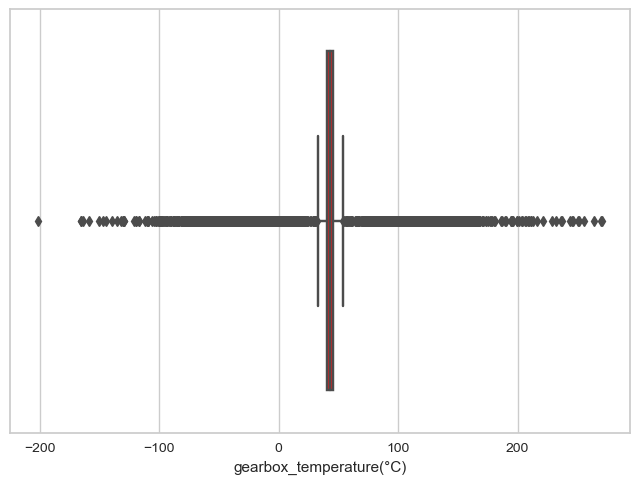

engine_temperature(°C)


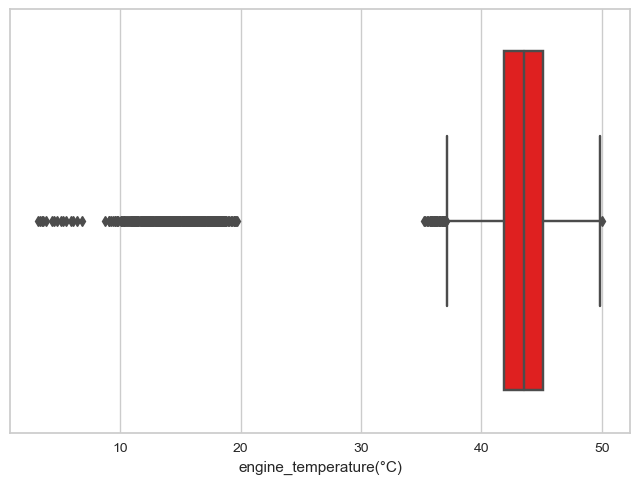

motor_torque(N-m)


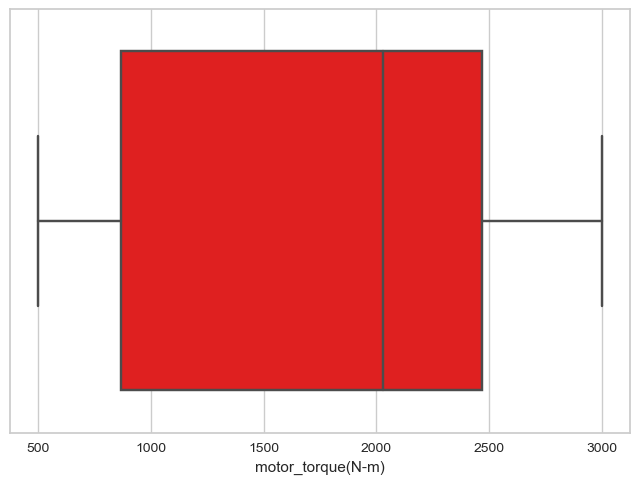

generator_temperature(°C)


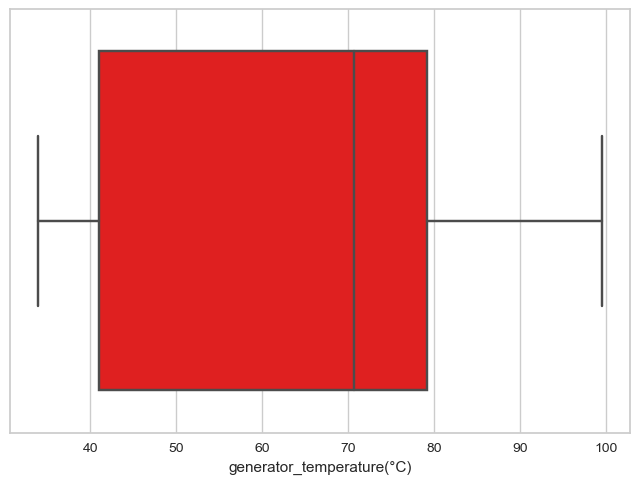

atmospheric_pressure(Pascal)


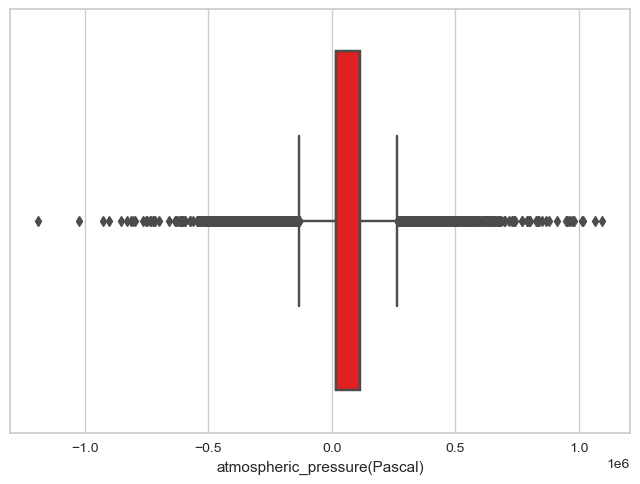

area_temperature(°C)


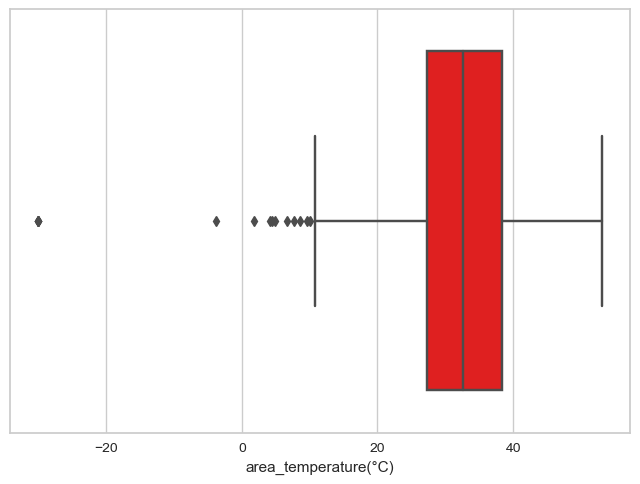

windmill_body_temperature(°C)


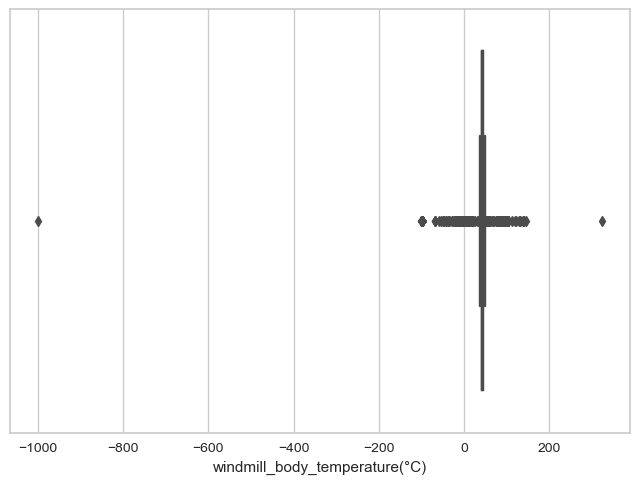

wind_direction(°)


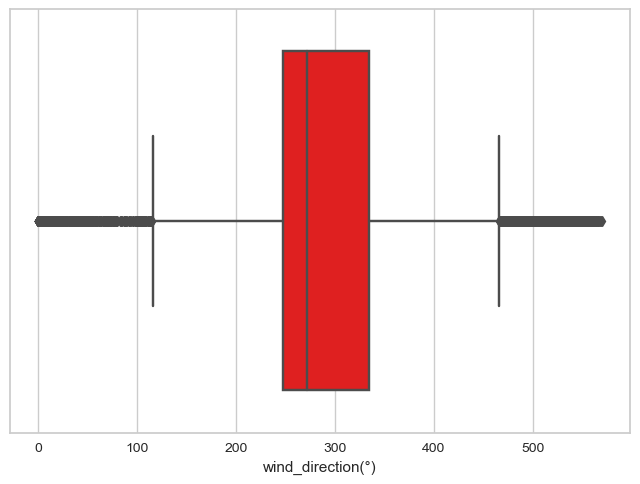

resistance(ohm)


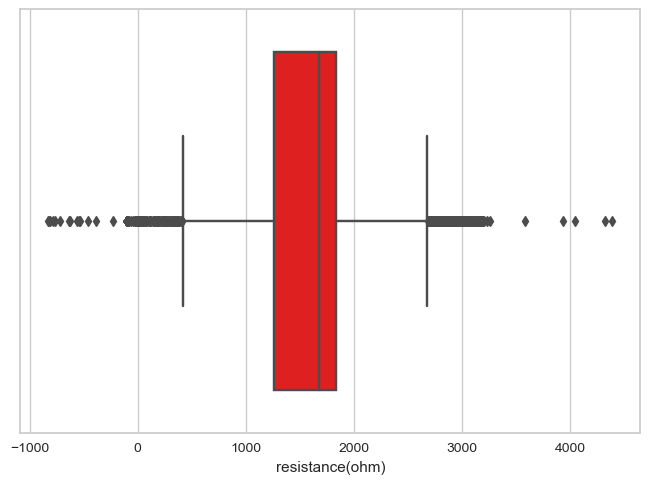

rotor_torque(N-m)


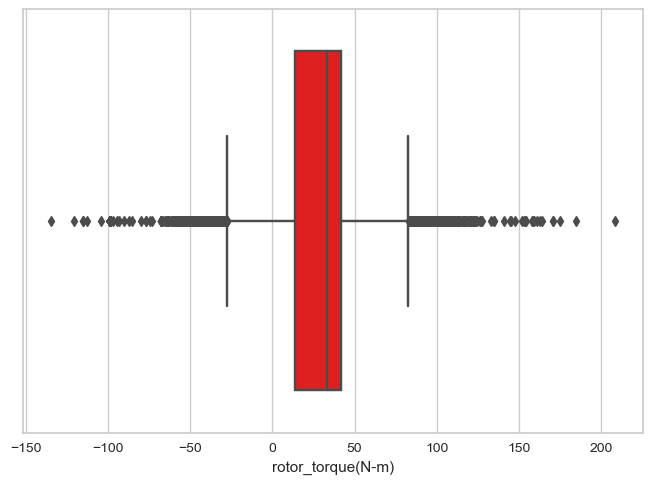

blade_length(m)


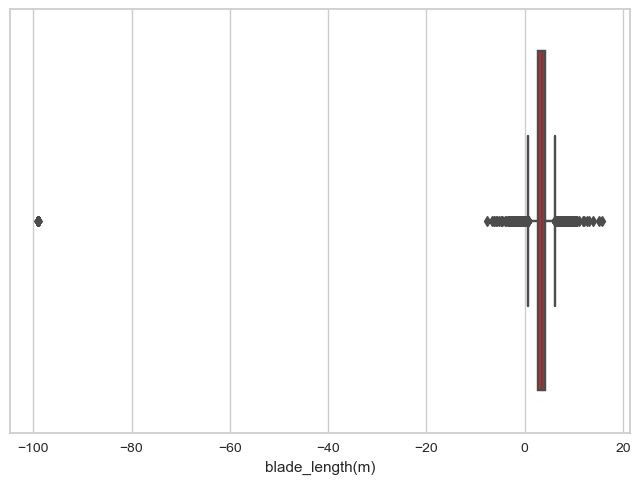

blade_breadth(m)


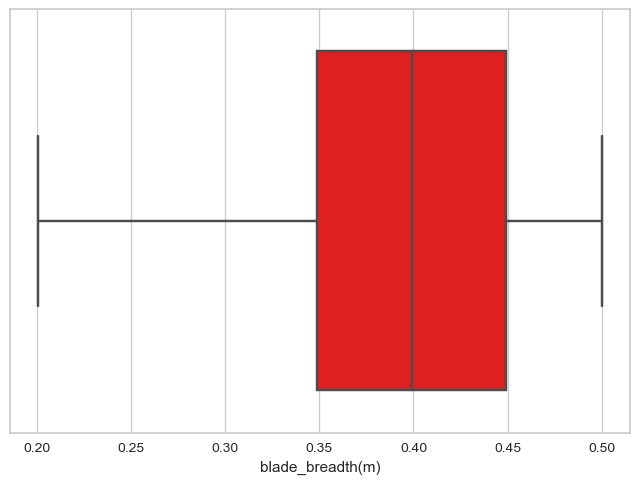

windmill_height(m)


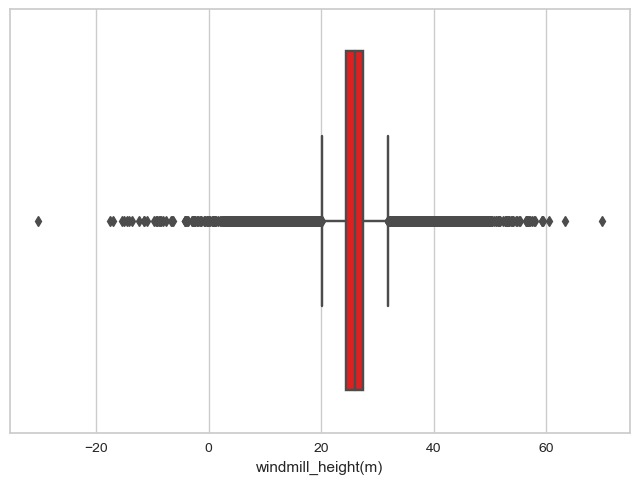

In [109]:
for col in test_df.iloc[:,1:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [110]:
def Outlier(var):
    for x in var.iloc[:, 1:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

wind_speed(m/s)


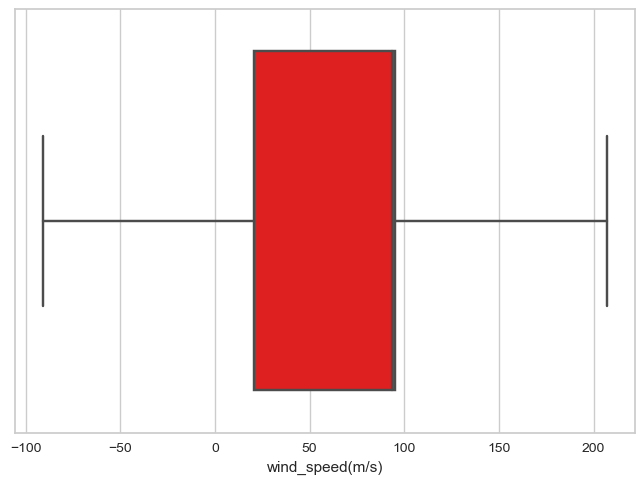

atmospheric_temperature(°C)


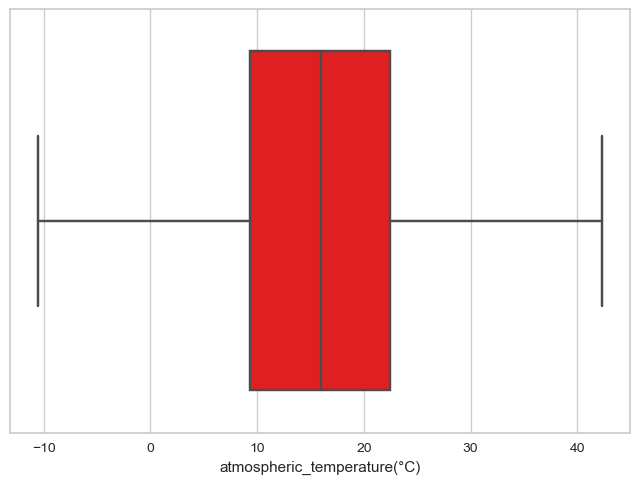

shaft_temperature(°C)


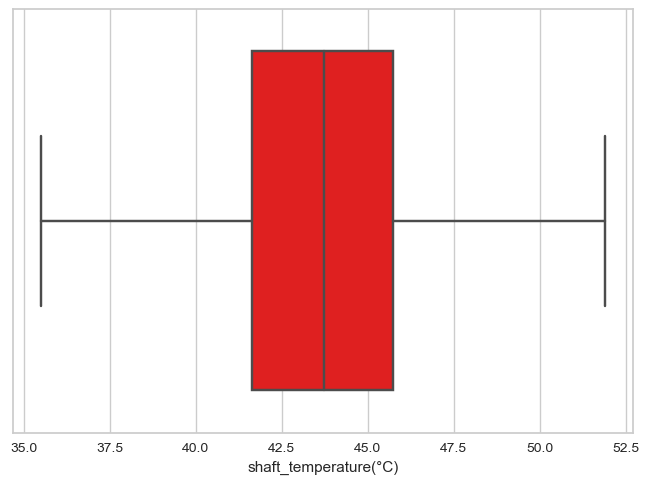

blades_angle(°)


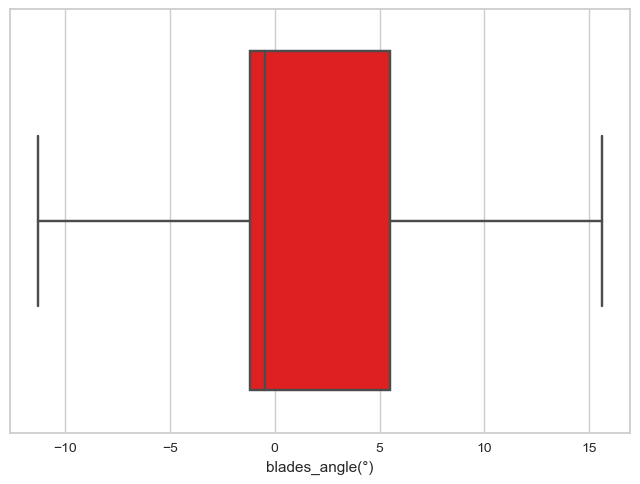

gearbox_temperature(°C)


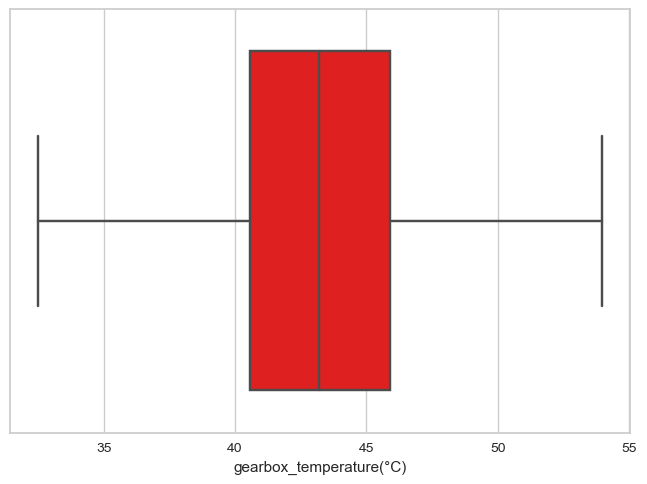

engine_temperature(°C)


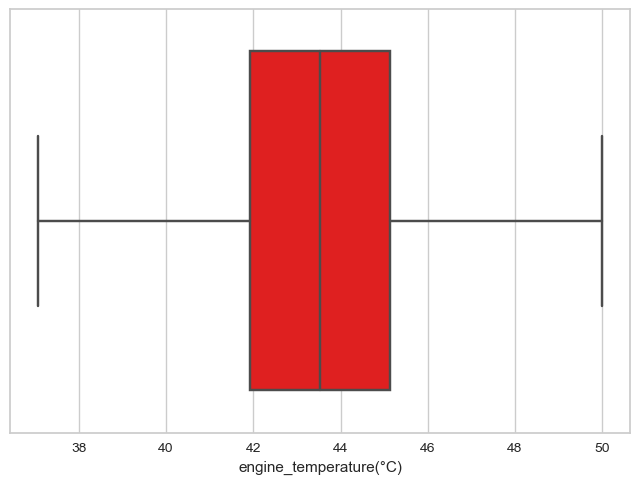

motor_torque(N-m)


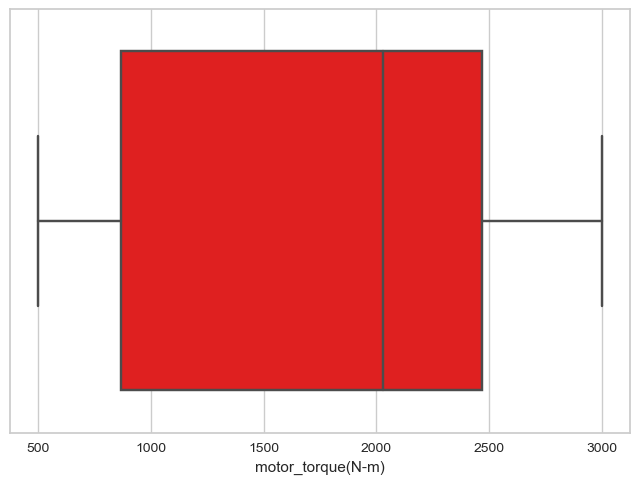

generator_temperature(°C)


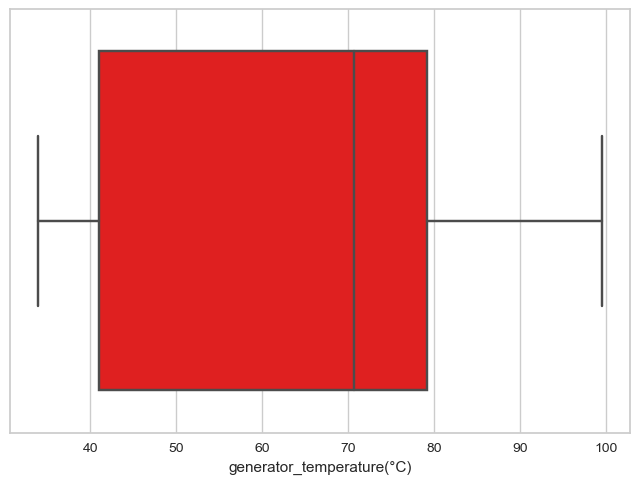

atmospheric_pressure(Pascal)


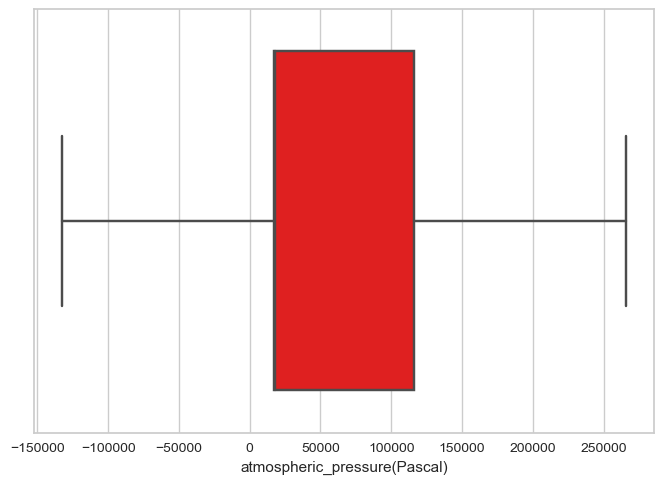

area_temperature(°C)


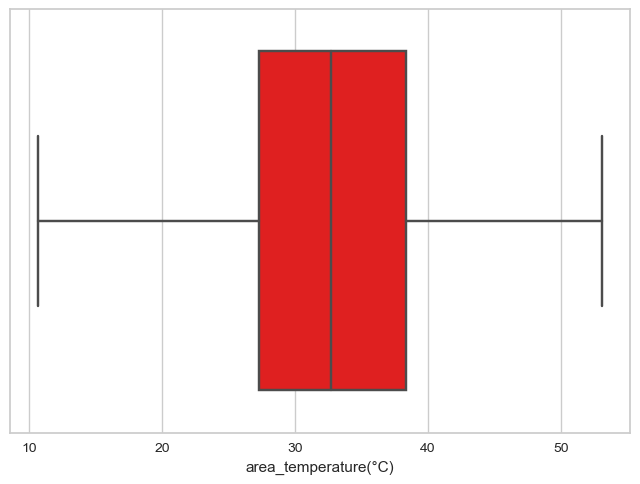

windmill_body_temperature(°C)


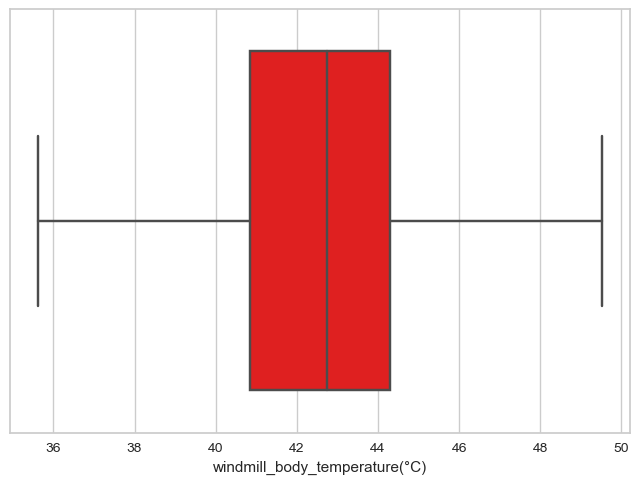

wind_direction(°)


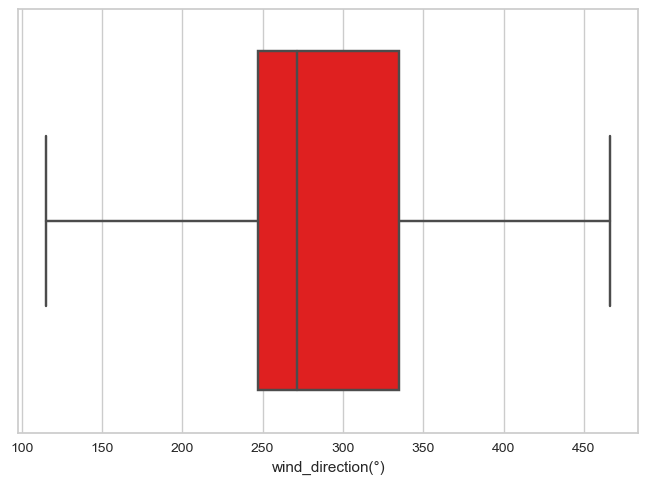

resistance(ohm)


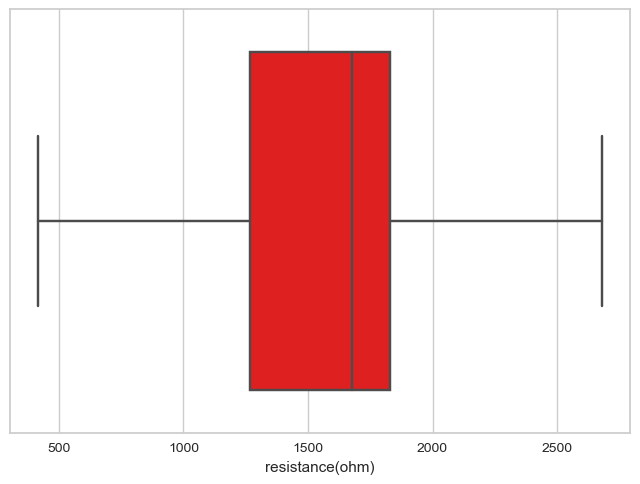

rotor_torque(N-m)


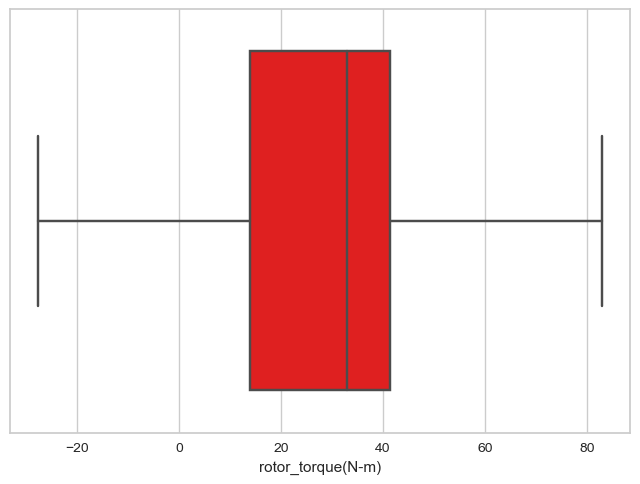

blade_length(m)


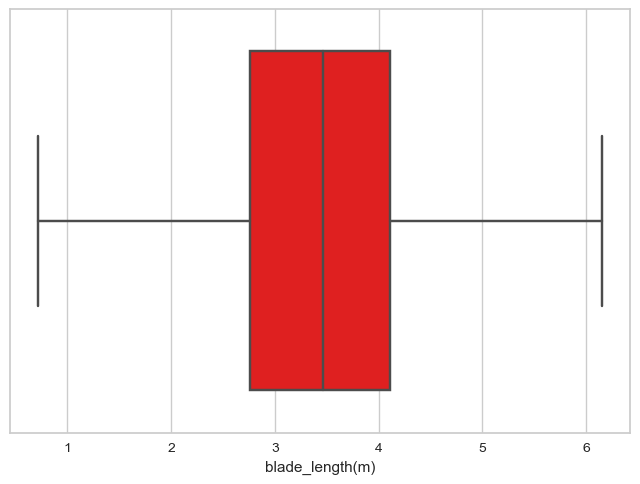

blade_breadth(m)


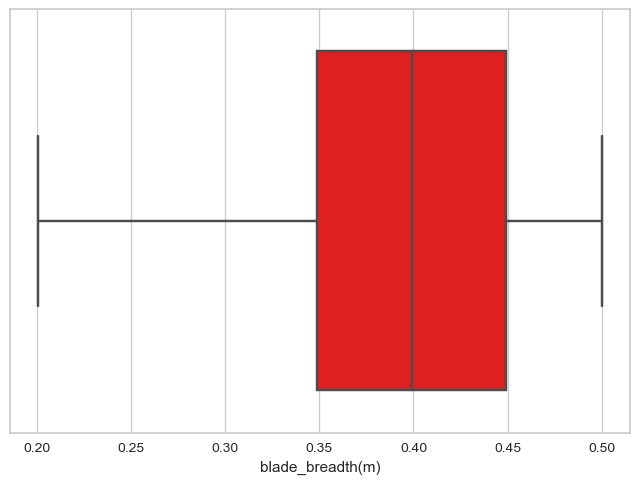

windmill_height(m)


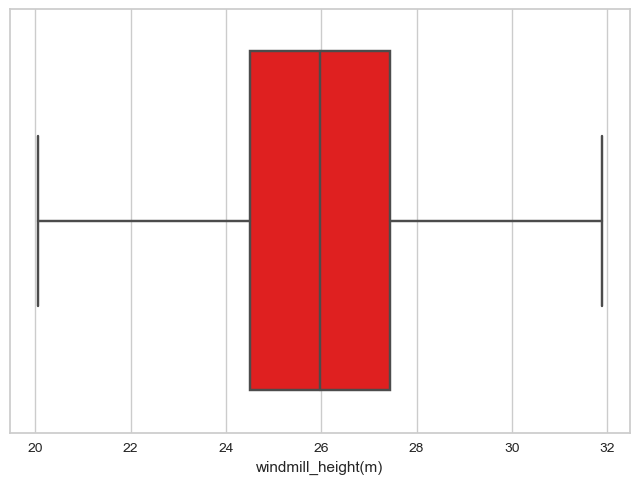

In [111]:
for col in test_df.iloc[:,1:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [114]:
df_test.drop(['tracking_id', 'wind_speed(m/s)', 'generator_temperature(°C)', 'blade_breadth(m)','engine_temperature(°C)','area_temperature(°C)', 'wind_direction(°)', 'gearbox_temperature(°C)', 'blade_length(m)', 'atmospheric_temperature(°C)',
       'rotor_torque(N-m)', 'windmill_body_temperature(°C)', 'windmill_height(m)', 'shaft_temperature(°C)',], axis = 1, inplace = True)

In [115]:
df_test.head()

,blades_angle(°),motor_torque(N-m),atmospheric_pressure(Pascal),resistance(ohm)
0,15.592883,1096.349402,16531.411599,641.241639
1,-11.274029,534.155038,265741.316386,1163.903620
2,-0.395538,2875.042178,17408.104397,1929.490567
3,9.661323,2777.902185,18191.550526,1990.390425
4,1.606224,759.937716,113284.111693,1188.233330


In [116]:
df_test = scaler.transform(df_test)

In [117]:
predicted_test = Bag_reg.predict(df_test)

In [118]:
test_df['windmill_generated_power(kW/h)'] = predicted_test

In [119]:
test_df.head()

,blades_angle(°),motor_torque(N-m),atmospheric_pressure(Pascal),resistance(ohm),windmill_generated_power(kW/h)
0,15.592883,1096.349402,16531.411599,641.241639,3.723879
1,-11.274029,534.155038,265741.316386,1163.903620,3.751094
2,-0.395538,2875.042178,17408.104397,1929.490567,3.742967
3,9.661323,2777.902185,18191.550526,1990.390425,3.729629
4,1.606224,759.937716,113284.111693,1188.233330,3.743231


In [120]:
test_df.to_csv('submission_turbine.csv', index = False, header = False)